# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 9.5

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

Градиент MSE записывается как:

$$\nabla Q(w) = 2X^T(Xw - y)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [37]:
%autoreload 2

import numpy as np
from sklearn.metrics import r2_score

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)
assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/95428503/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/95428735/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/95429356/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/96036642/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/96034745/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
%config InlineBackend.figure_format = 'retina'

# sns.set(style='whitegrid', palette='deep')
# sns.set(style='darkgrid', palette='rocket')
sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


нет пропусков

In [11]:
data.describe()

powerPS      kilometer  autoAgeMonths          price
count  241190.000000  241190.000000  241190.000000  241190.000000
mean      131.271628  123766.677723     144.768676    6887.741892
std        60.622613   39825.955933      73.092598    8024.451993
min        51.000000    5000.000000       1.000000       1.000000
25%        90.000000  100000.000000      92.000000    1750.000000
50%       120.000000  150000.000000     140.000000    4100.000000
75%       160.000000  150000.000000     192.000000    8999.000000
max       589.000000  150000.000000     600.000000   99999.000000

In [12]:
data.nunique()

brand                  38
model                 249
vehicleType             8
gearbox                 2
fuelType                7
notRepairedDamage       2
powerPS               406
kilometer              13
autoAgeMonths         594
price                4919
dtype: int64

In [13]:
#мало уникальных значений пробега
data['kilometer'].value_counts()

kilometer
150000    147852
125000     26725
100000     11202
90000       9334
80000       8414
70000       7568
60000       6900
50000       6086
40000       5148
30000       4699
20000       4092
5000        1802
10000       1368
Name: count, dtype: int64

In [14]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'autoAgeMonths', 'kilometer']
other = []
#'model': очень много значений, не обработать обычнми подходами вроде dummy, будет много колонок.

In [15]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

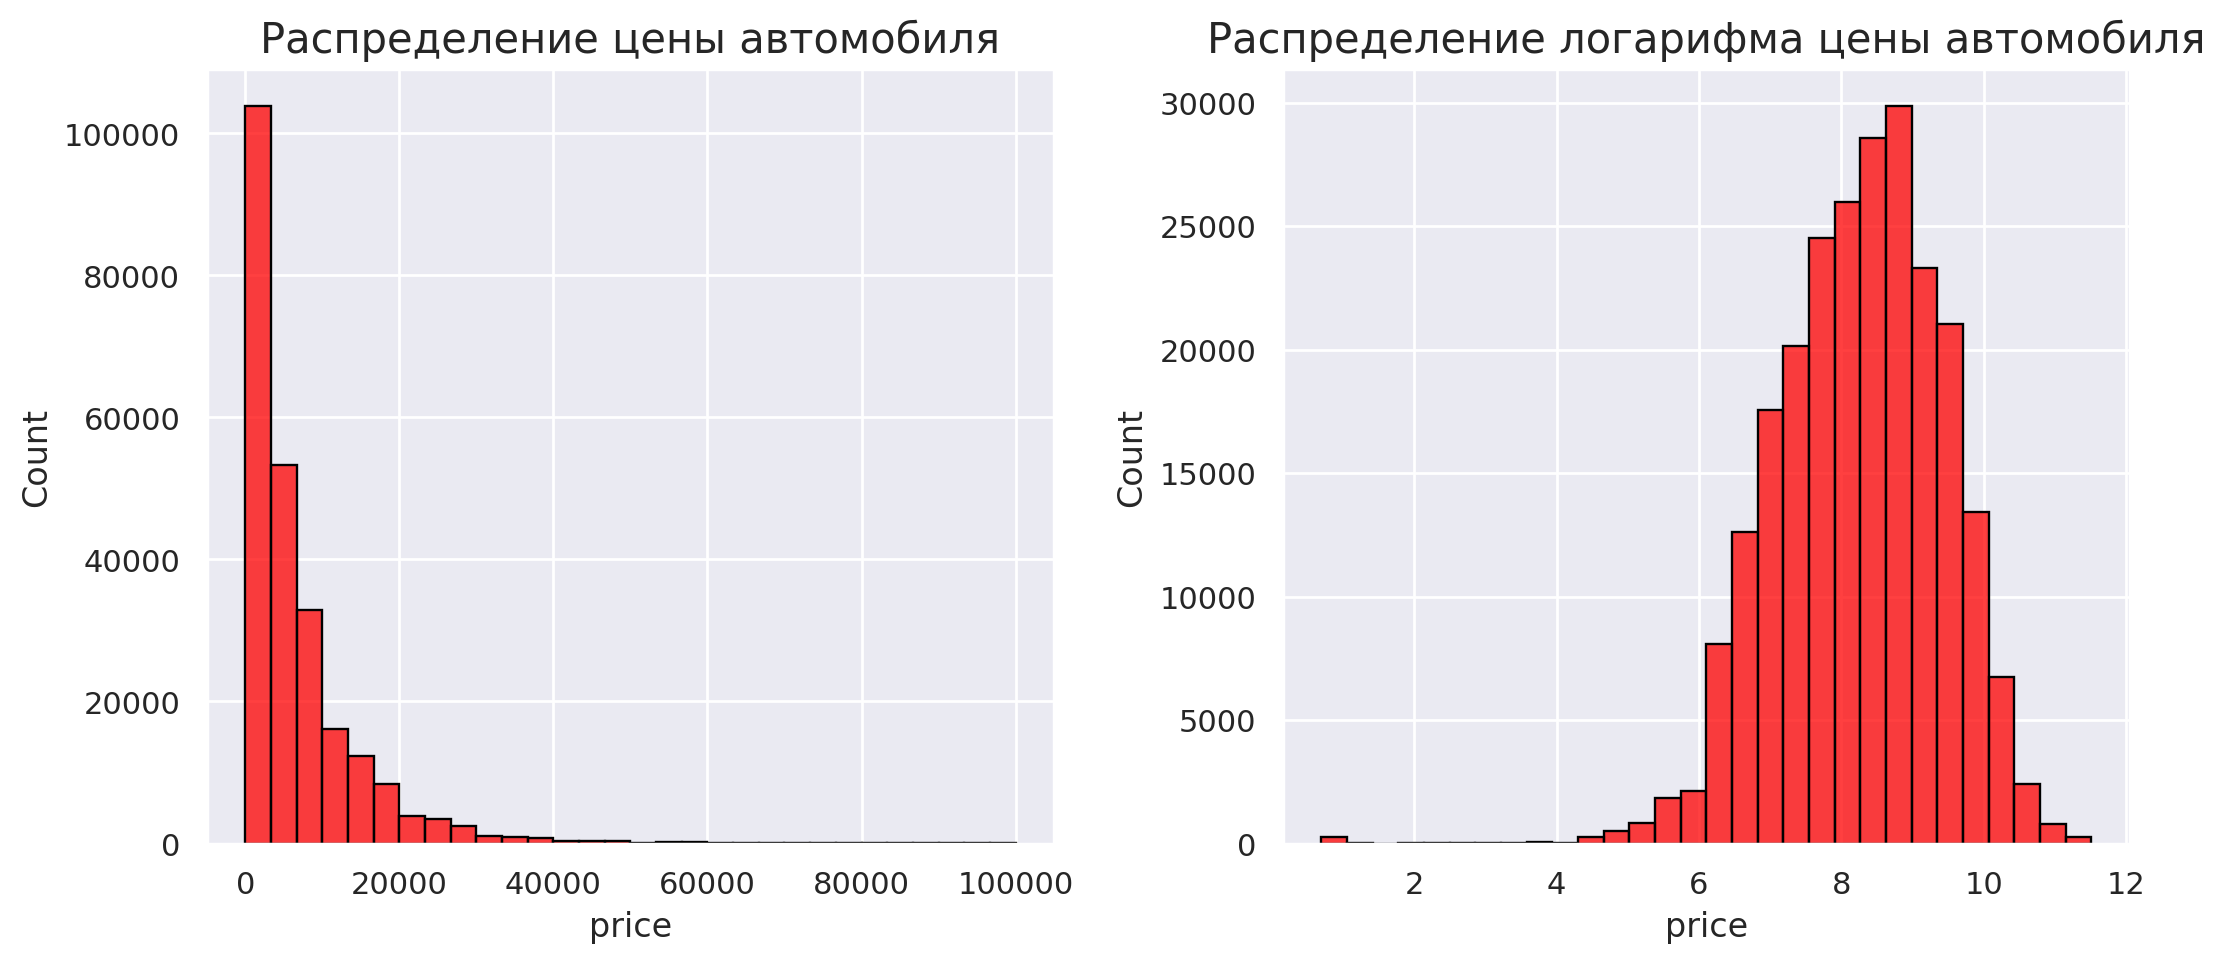

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
ax[0].set_title('Распределение цены автомобиля', fontsize=15)
sns.histplot(data['price'],
             bins=30,
             ax=ax[0], 
             color='red',
             edgecolor='black')

ax[1].set_title('Распределение логарифма цены автомобиля', fontsize=15)
sns.histplot(np.log1p(data['price'].values),
             bins=30,
             ax=ax[1], 
             color='red',
             edgecolor='black')
ax[1].set_xlabel('price')
fig.tight_layout()
plt.show()

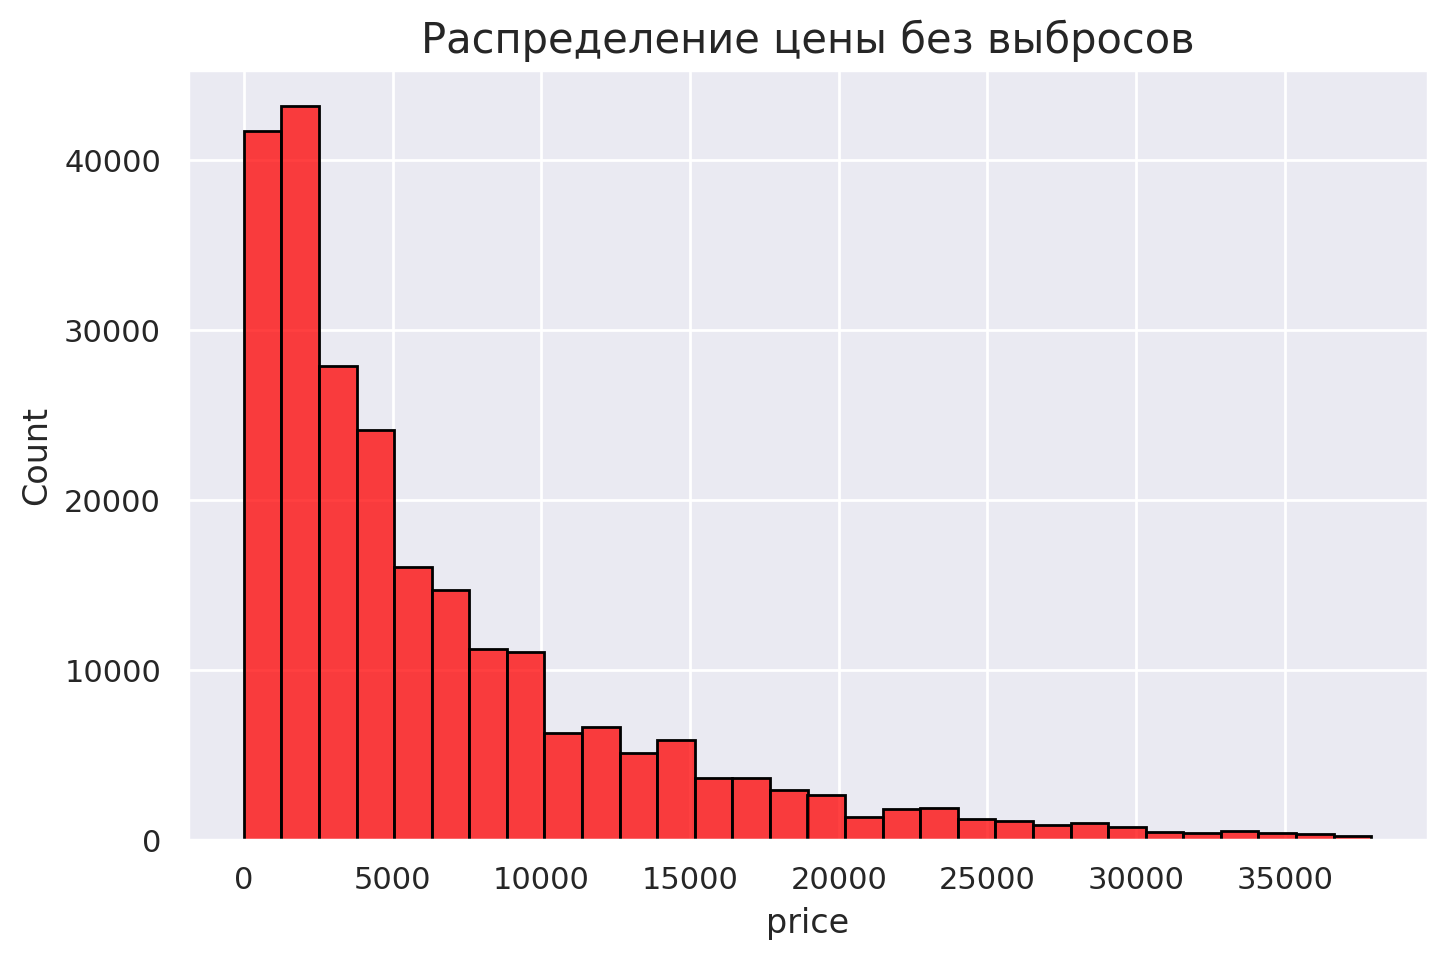

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title('Распределение цены без выбросов', fontsize=15)
sns.histplot(data[data['price'] < data['price'].quantile(0.99)]['price'],
             bins=30,
             ax=ax, 
             color='red',
             edgecolor='black');

In [18]:
data = data.loc[data[data['price'] < data['price'].quantile(0.99)].index] #улаление выбросов
data['log_price'] = data['price'].apply(np.log1p)

посмотрим, как больше похоже на линейную зависимость: с лог таргетом или с обычным

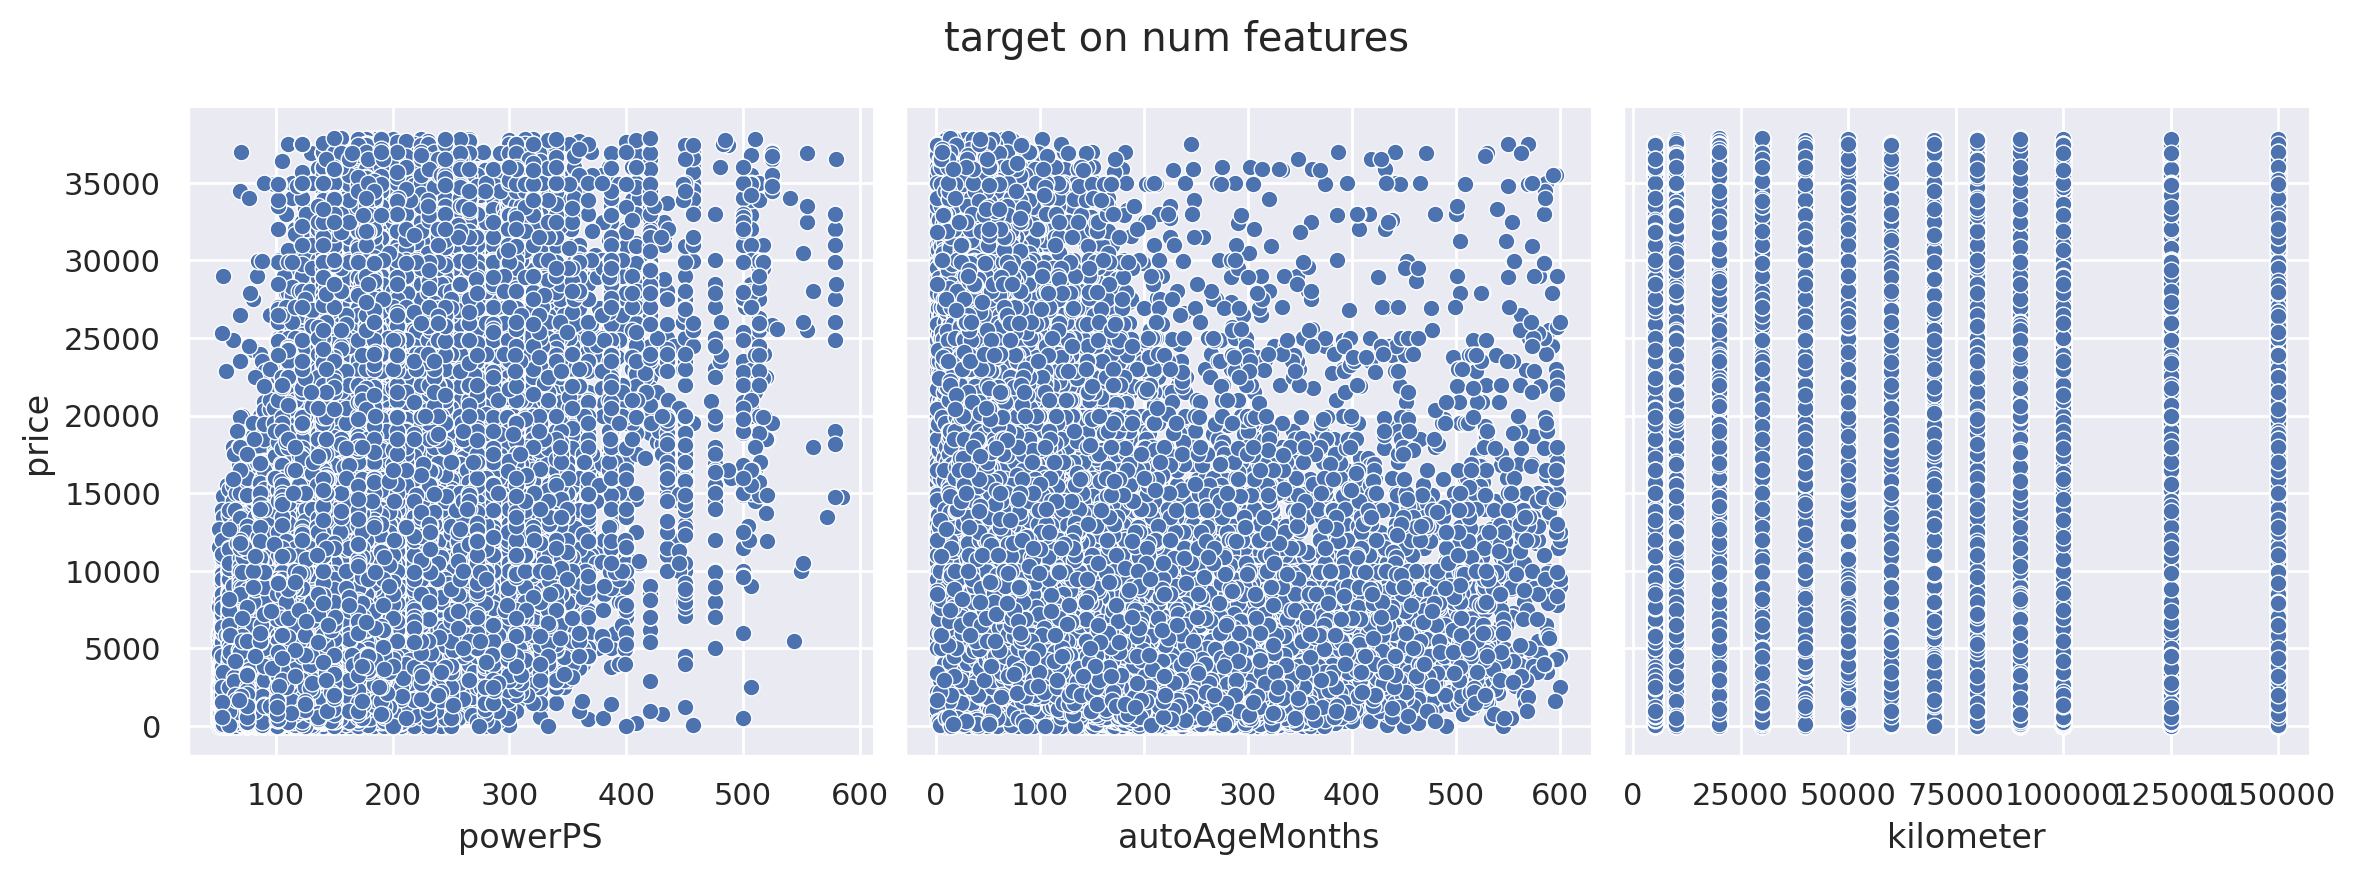

In [19]:
pp = sns.pairplot(data=data,
                  y_vars=['price'],
                  x_vars=numeric, height = 4)
pp.fig.suptitle("target on num features", y=1.08)
plt.show()

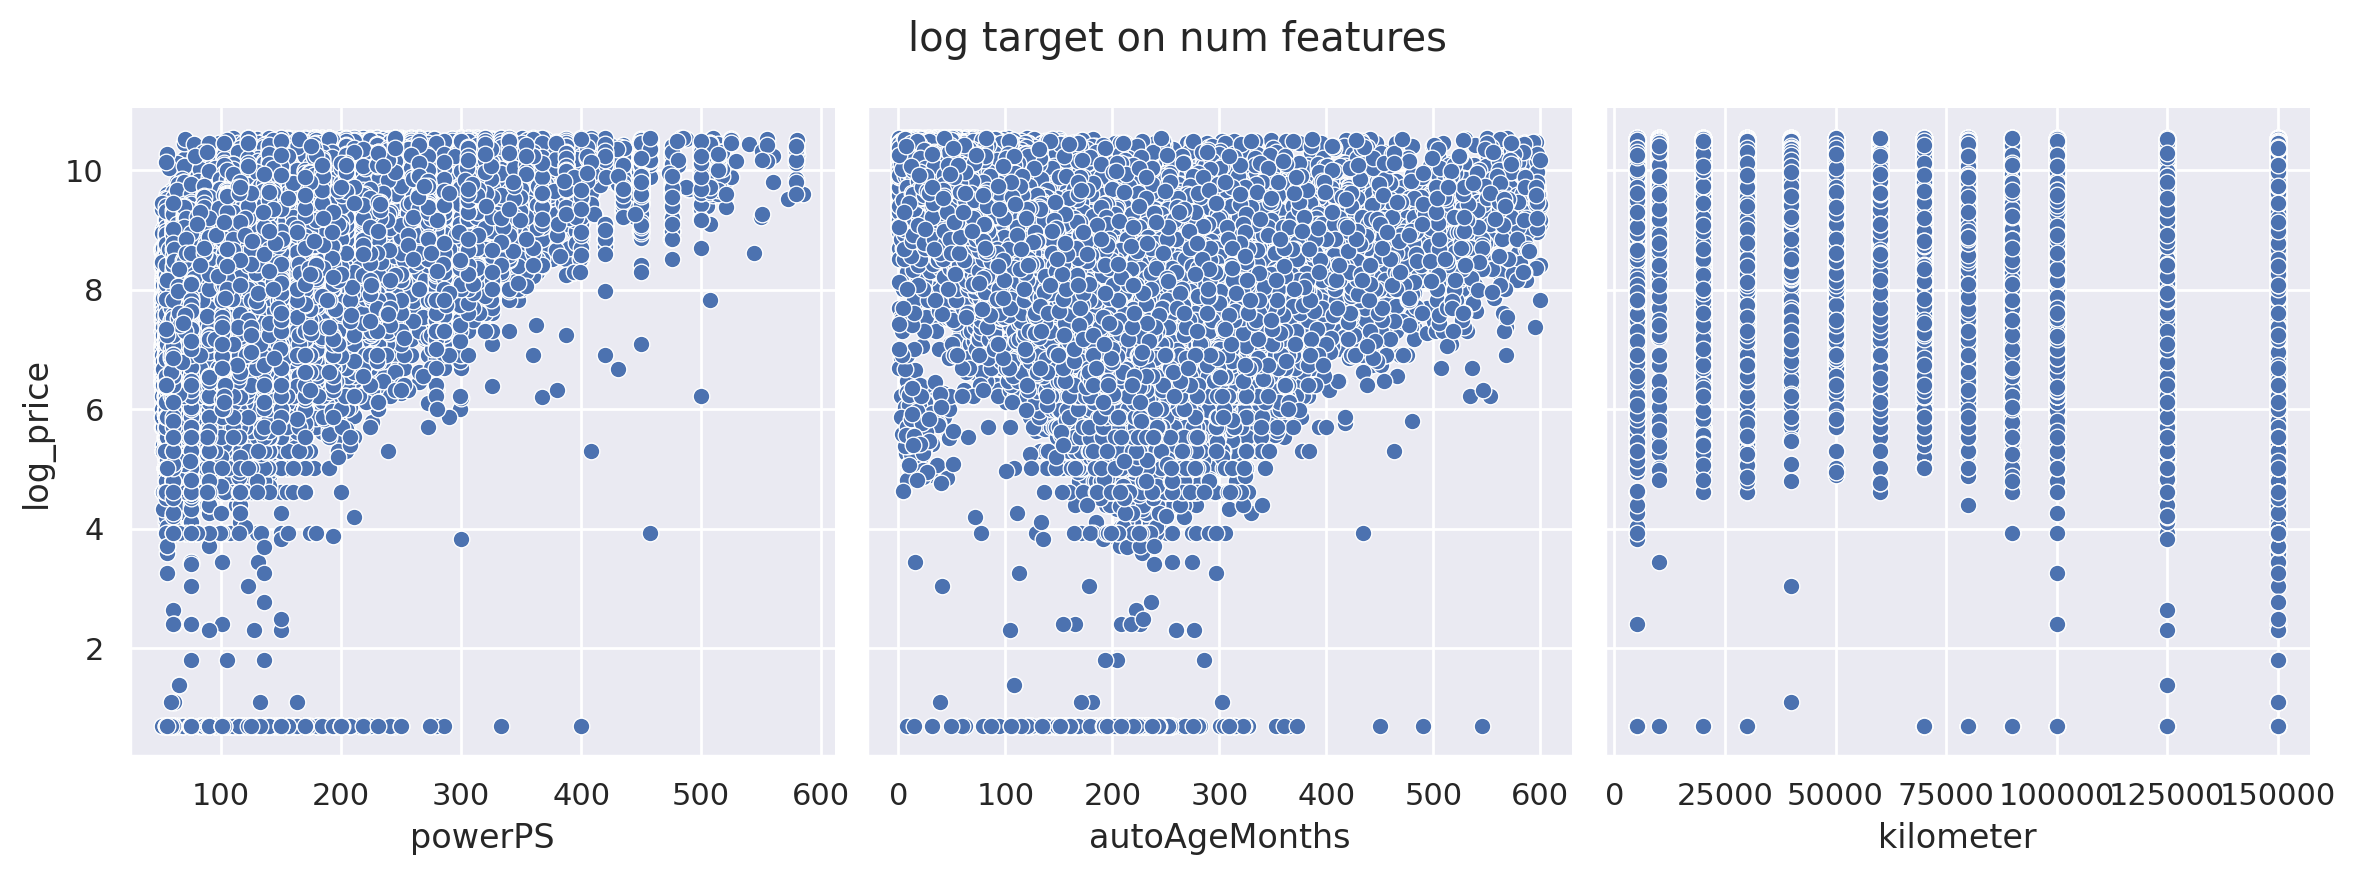

In [20]:
pp = sns.pairplot(data=data,
                  y_vars=['log_price'],
                  x_vars=numeric, height = 4)
pp.fig.suptitle("log target on num features", y=1.08)
plt.show()

Для числовых фичей имеет смысл брать логарифм, если после этого зависимость становится линейной, здесь ничего не похоже на линейную зависимость(единственное с логарифмом стало чуть более похожа powerPS.\
Для кат фичей при обработке dummy изменится смысл: в обычной регресси при прочих равных наличие той или иной категории будет увеличивать значение на константу, в регрессии логарфима при прочих равных наличие категории будет увеличивать значение таргета во сколько-то раз. Как правильнее конкретно для этой задачи мне сказать сложно, поэтому возьму таргет как логарифм просто потому что тогда будет распределение похожее на нормальное с достаточно маленьким разбросом. 

Зависимость таргета от категориальных фичей

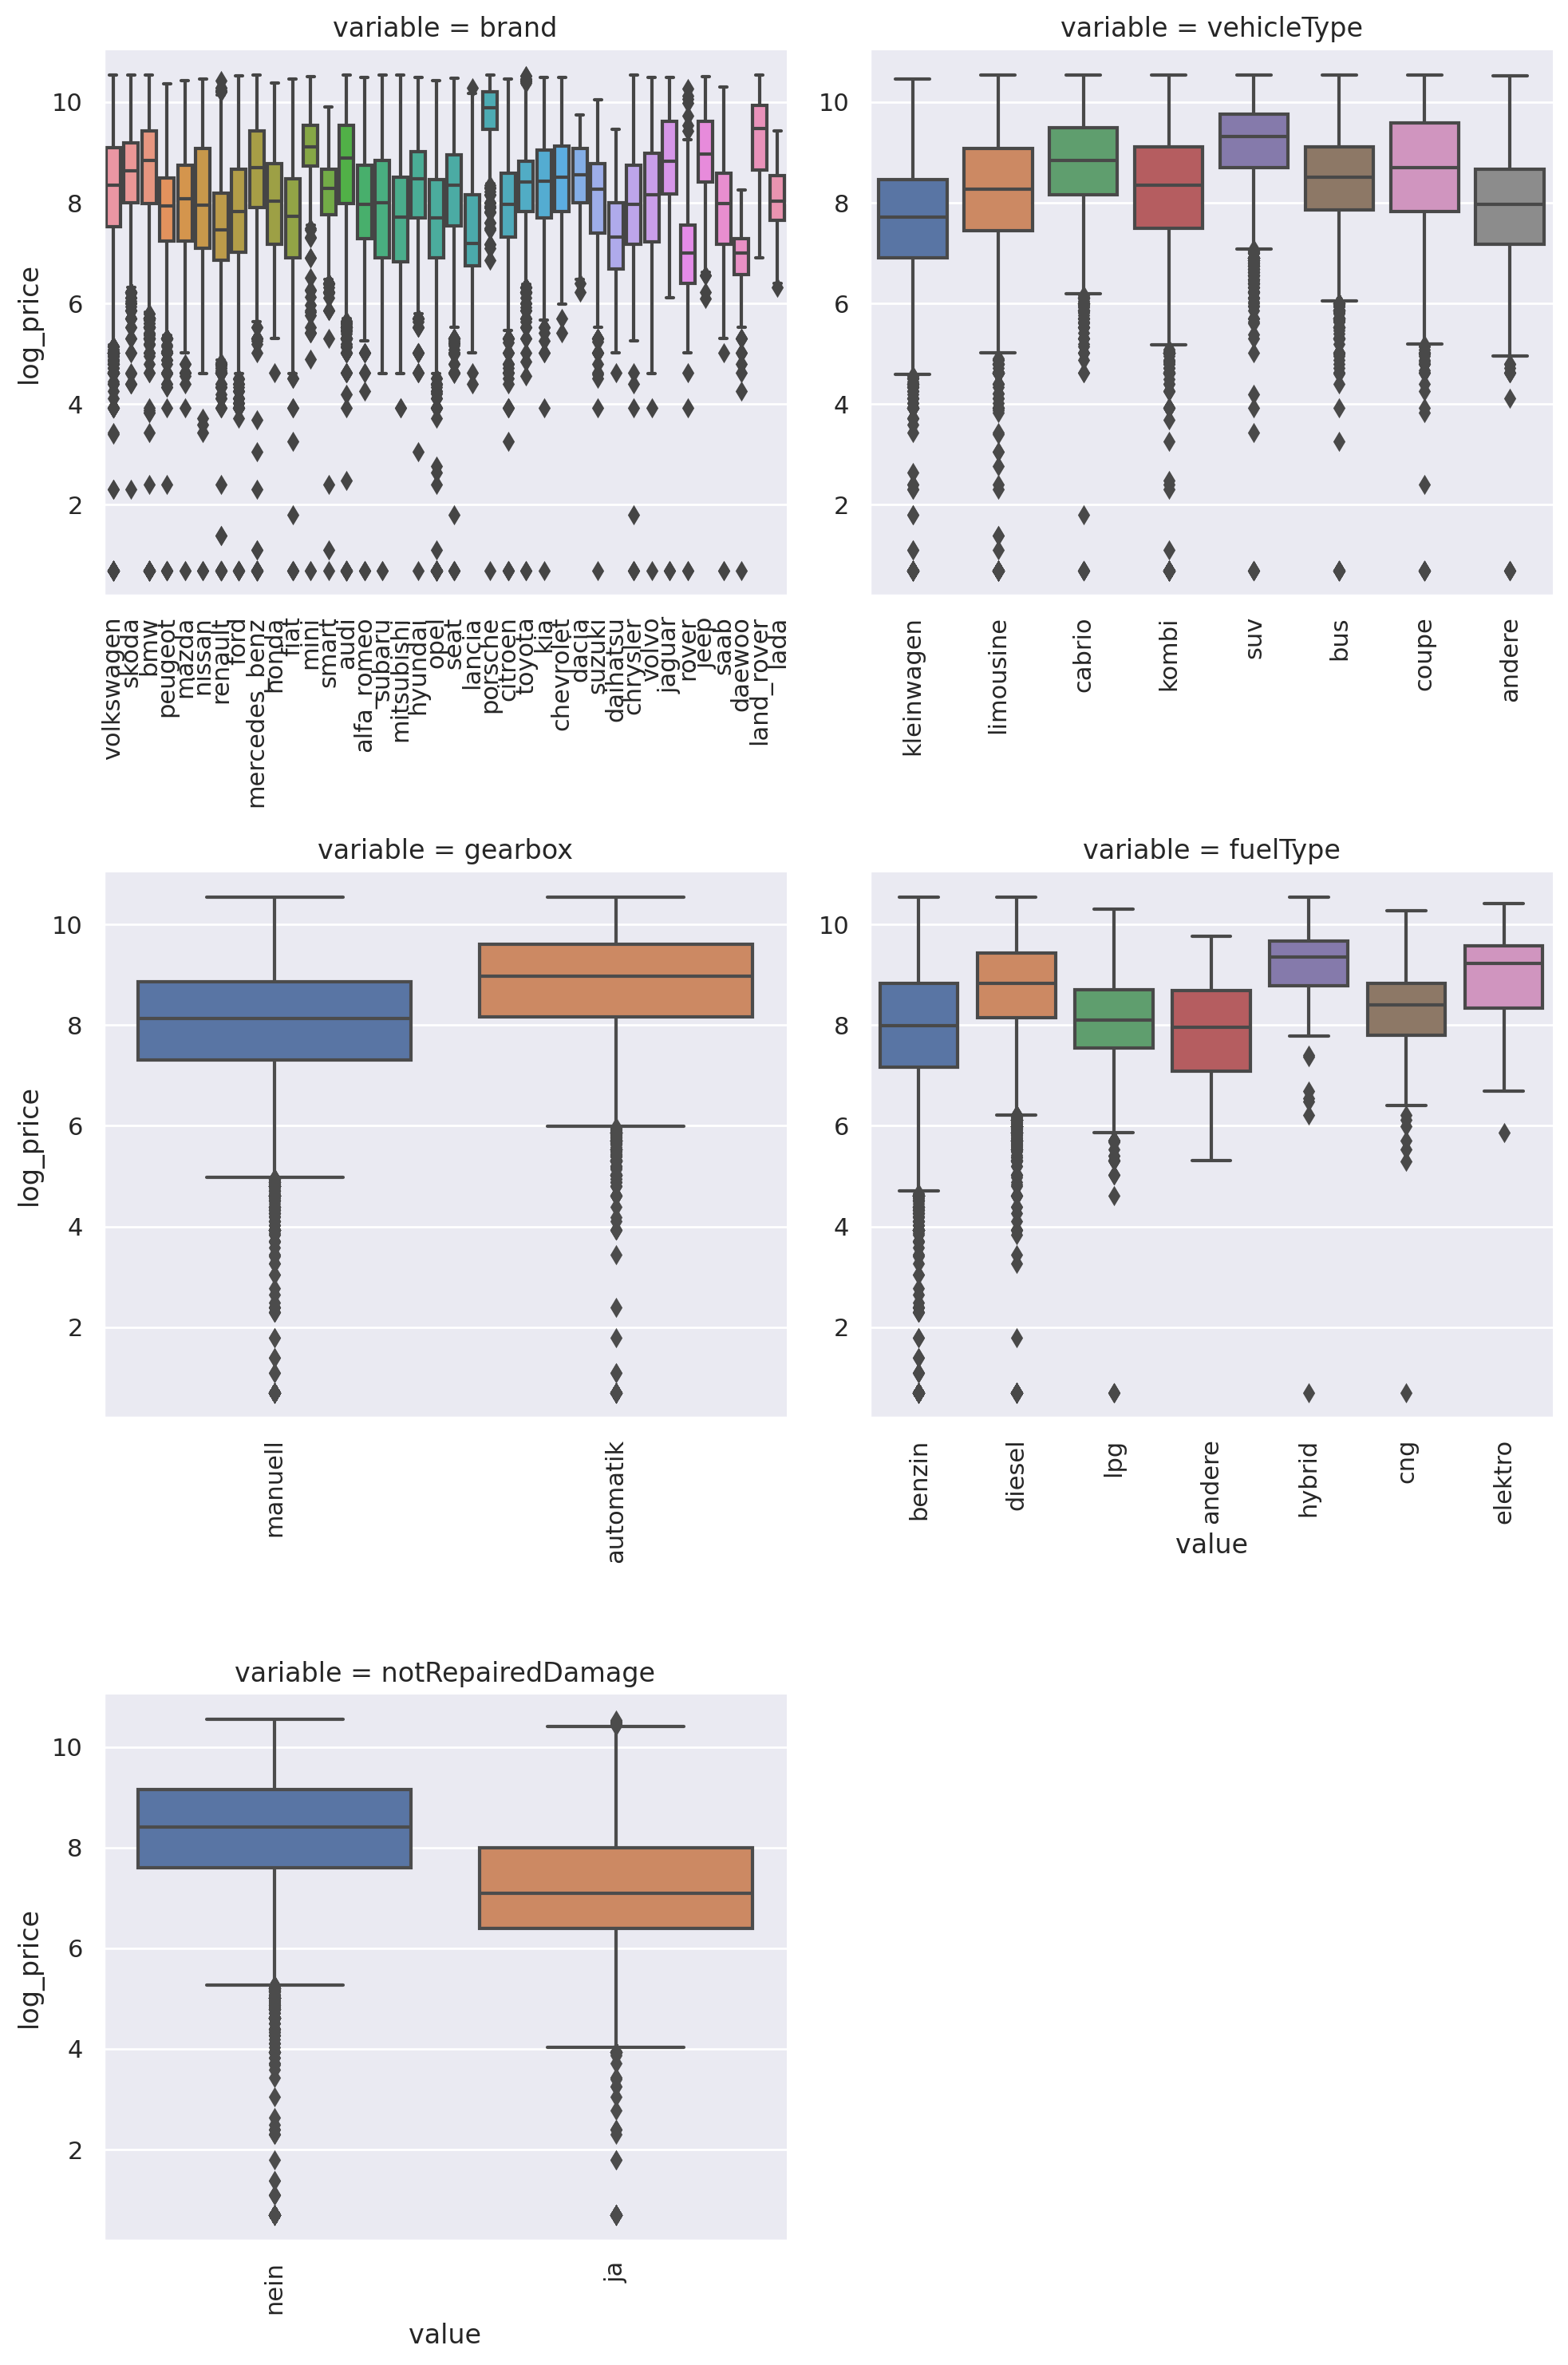

In [21]:
for c in categorical:
    data[c] = data[c].astype('category')
    
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(data, id_vars=['log_price'], value_vars=categorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "log_price")


В целом признаки явно влияют на таргет. Думаю, их можно закодировать просто one-hot, хотя с брэндом можно было бы как-то погруппировать.

Распределение признаков

In [22]:
numeric

['powerPS', 'autoAgeMonths', 'kilometer']

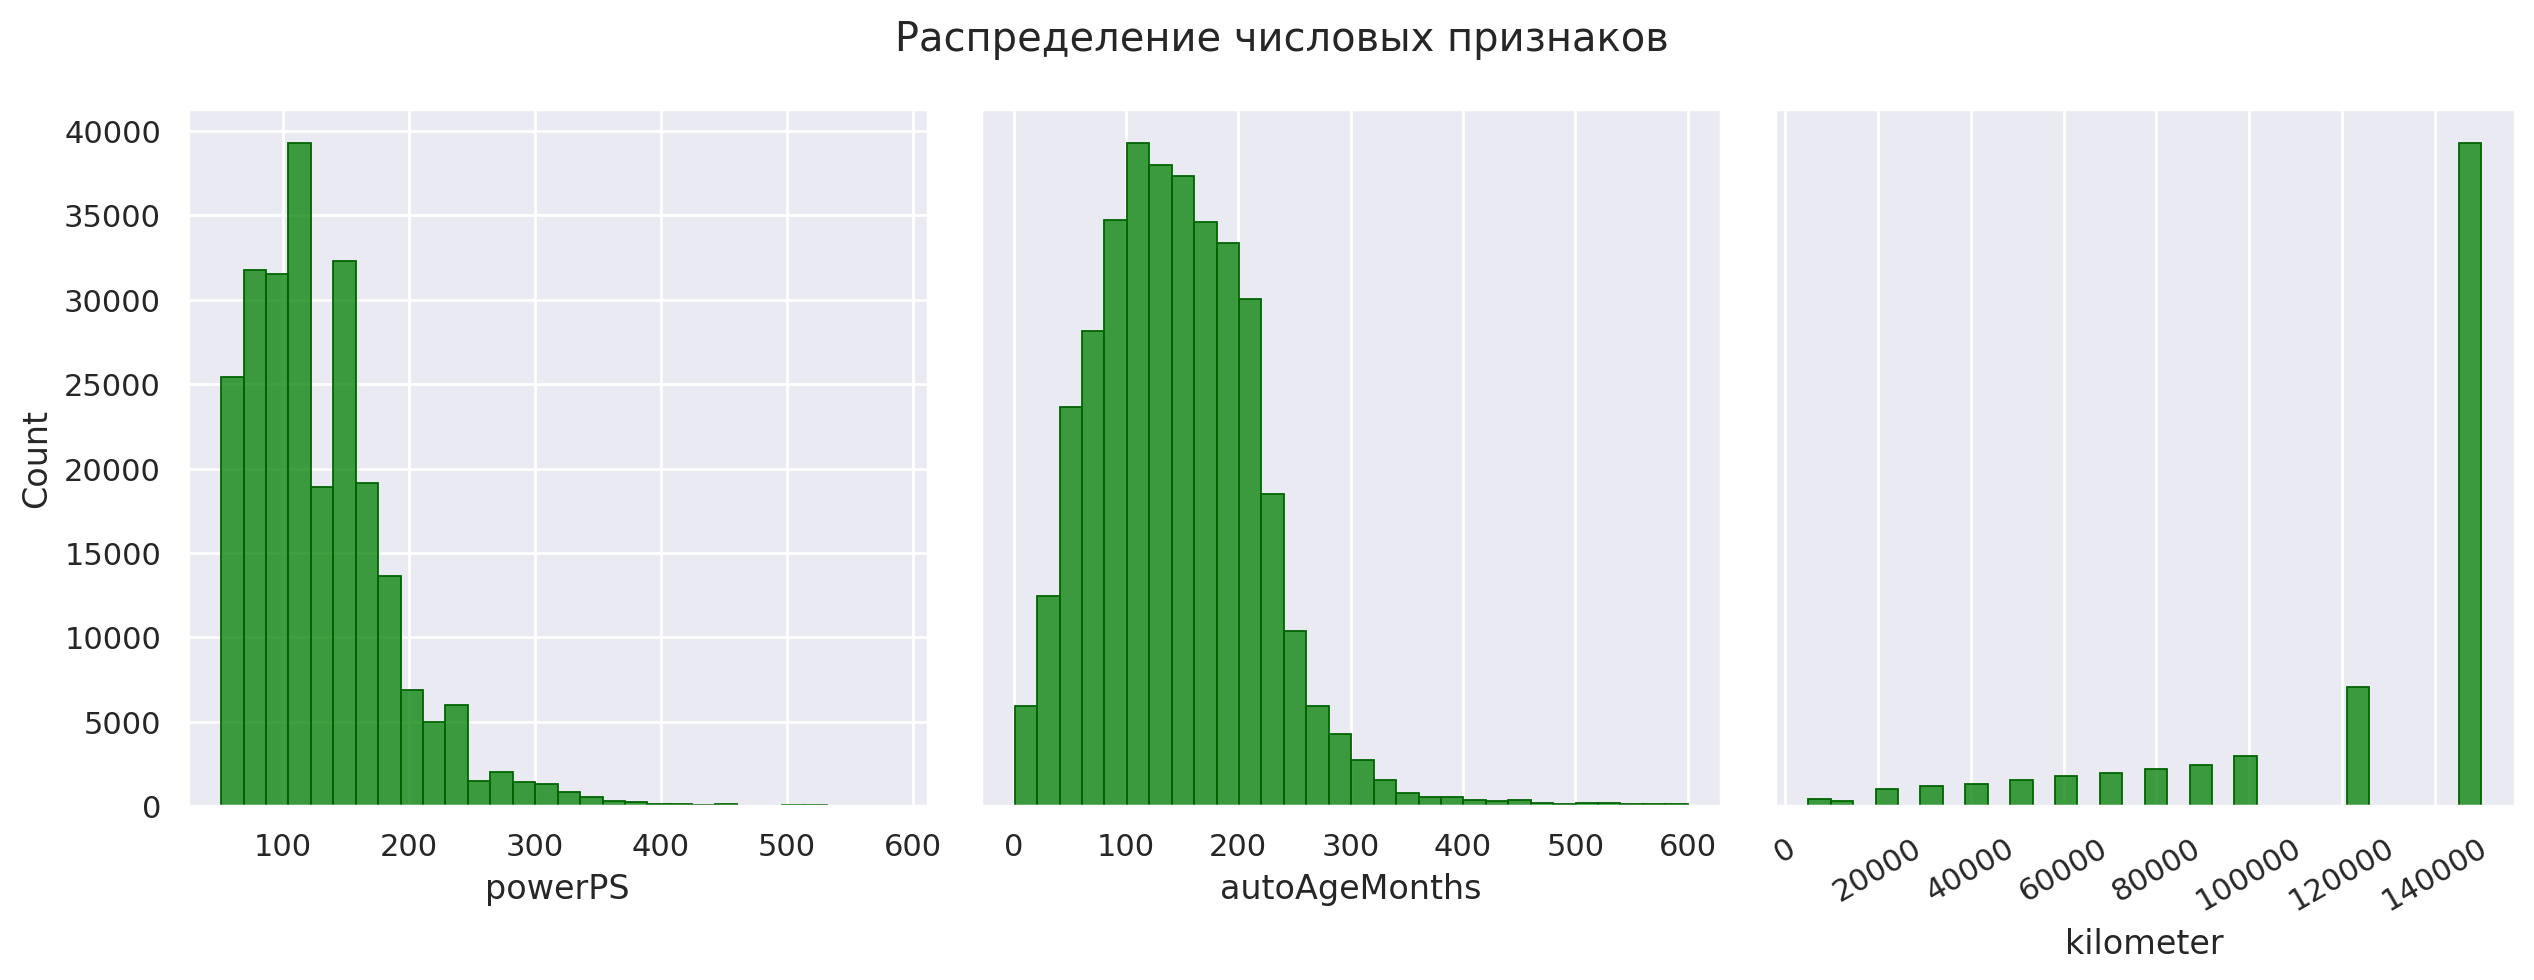

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
for i, feature in enumerate(numeric):
    sns.histplot(data[feature],
             bins=30,
             ax=ax[i], 
             color='green',
             edgecolor='darkgreen')
    if i>0:
        ax[i].get_yaxis().set_visible(False)
fig.suptitle('Распределение числовых признаков')
plt.xticks(rotation=30)
plt.tight_layout()

In [24]:
# без жестких выбросов
data = data.loc[data[data['powerPS'] < data['powerPS'].quantile(0.995)].index]
data = data.loc[data[data['autoAgeMonths'] < data['autoAgeMonths'].quantile(0.995)].index]

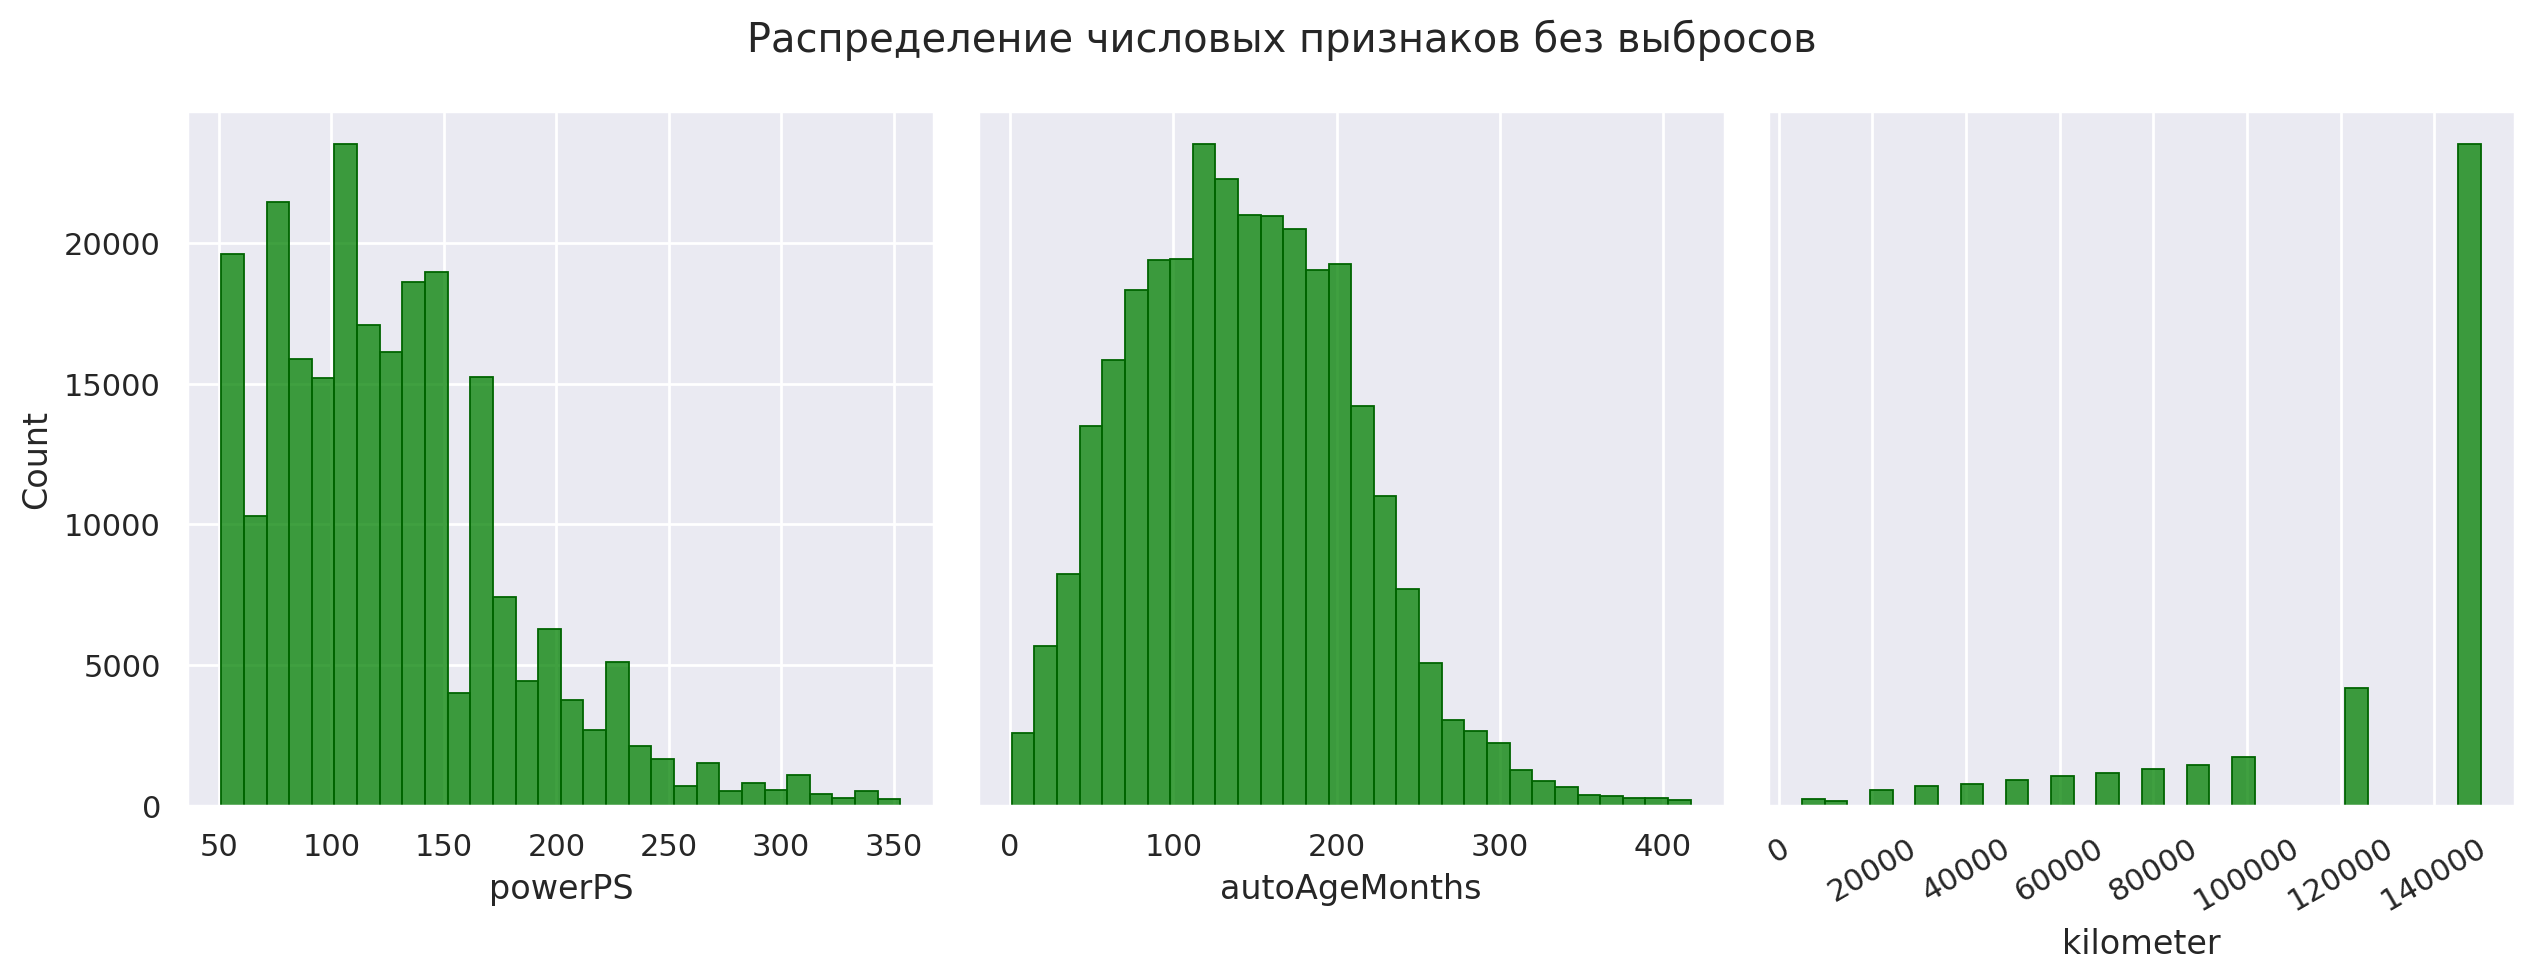

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
for i, feature in enumerate(numeric):
    sns.histplot(data[feature],
             bins=30,
             ax=ax[i], 
             color='green',
             edgecolor='darkgreen')
    if i>0:
        ax[i].get_yaxis().set_visible(False)
fig.suptitle('Распределение числовых признаков без выбросов')
plt.xticks(rotation=30)
plt.tight_layout()

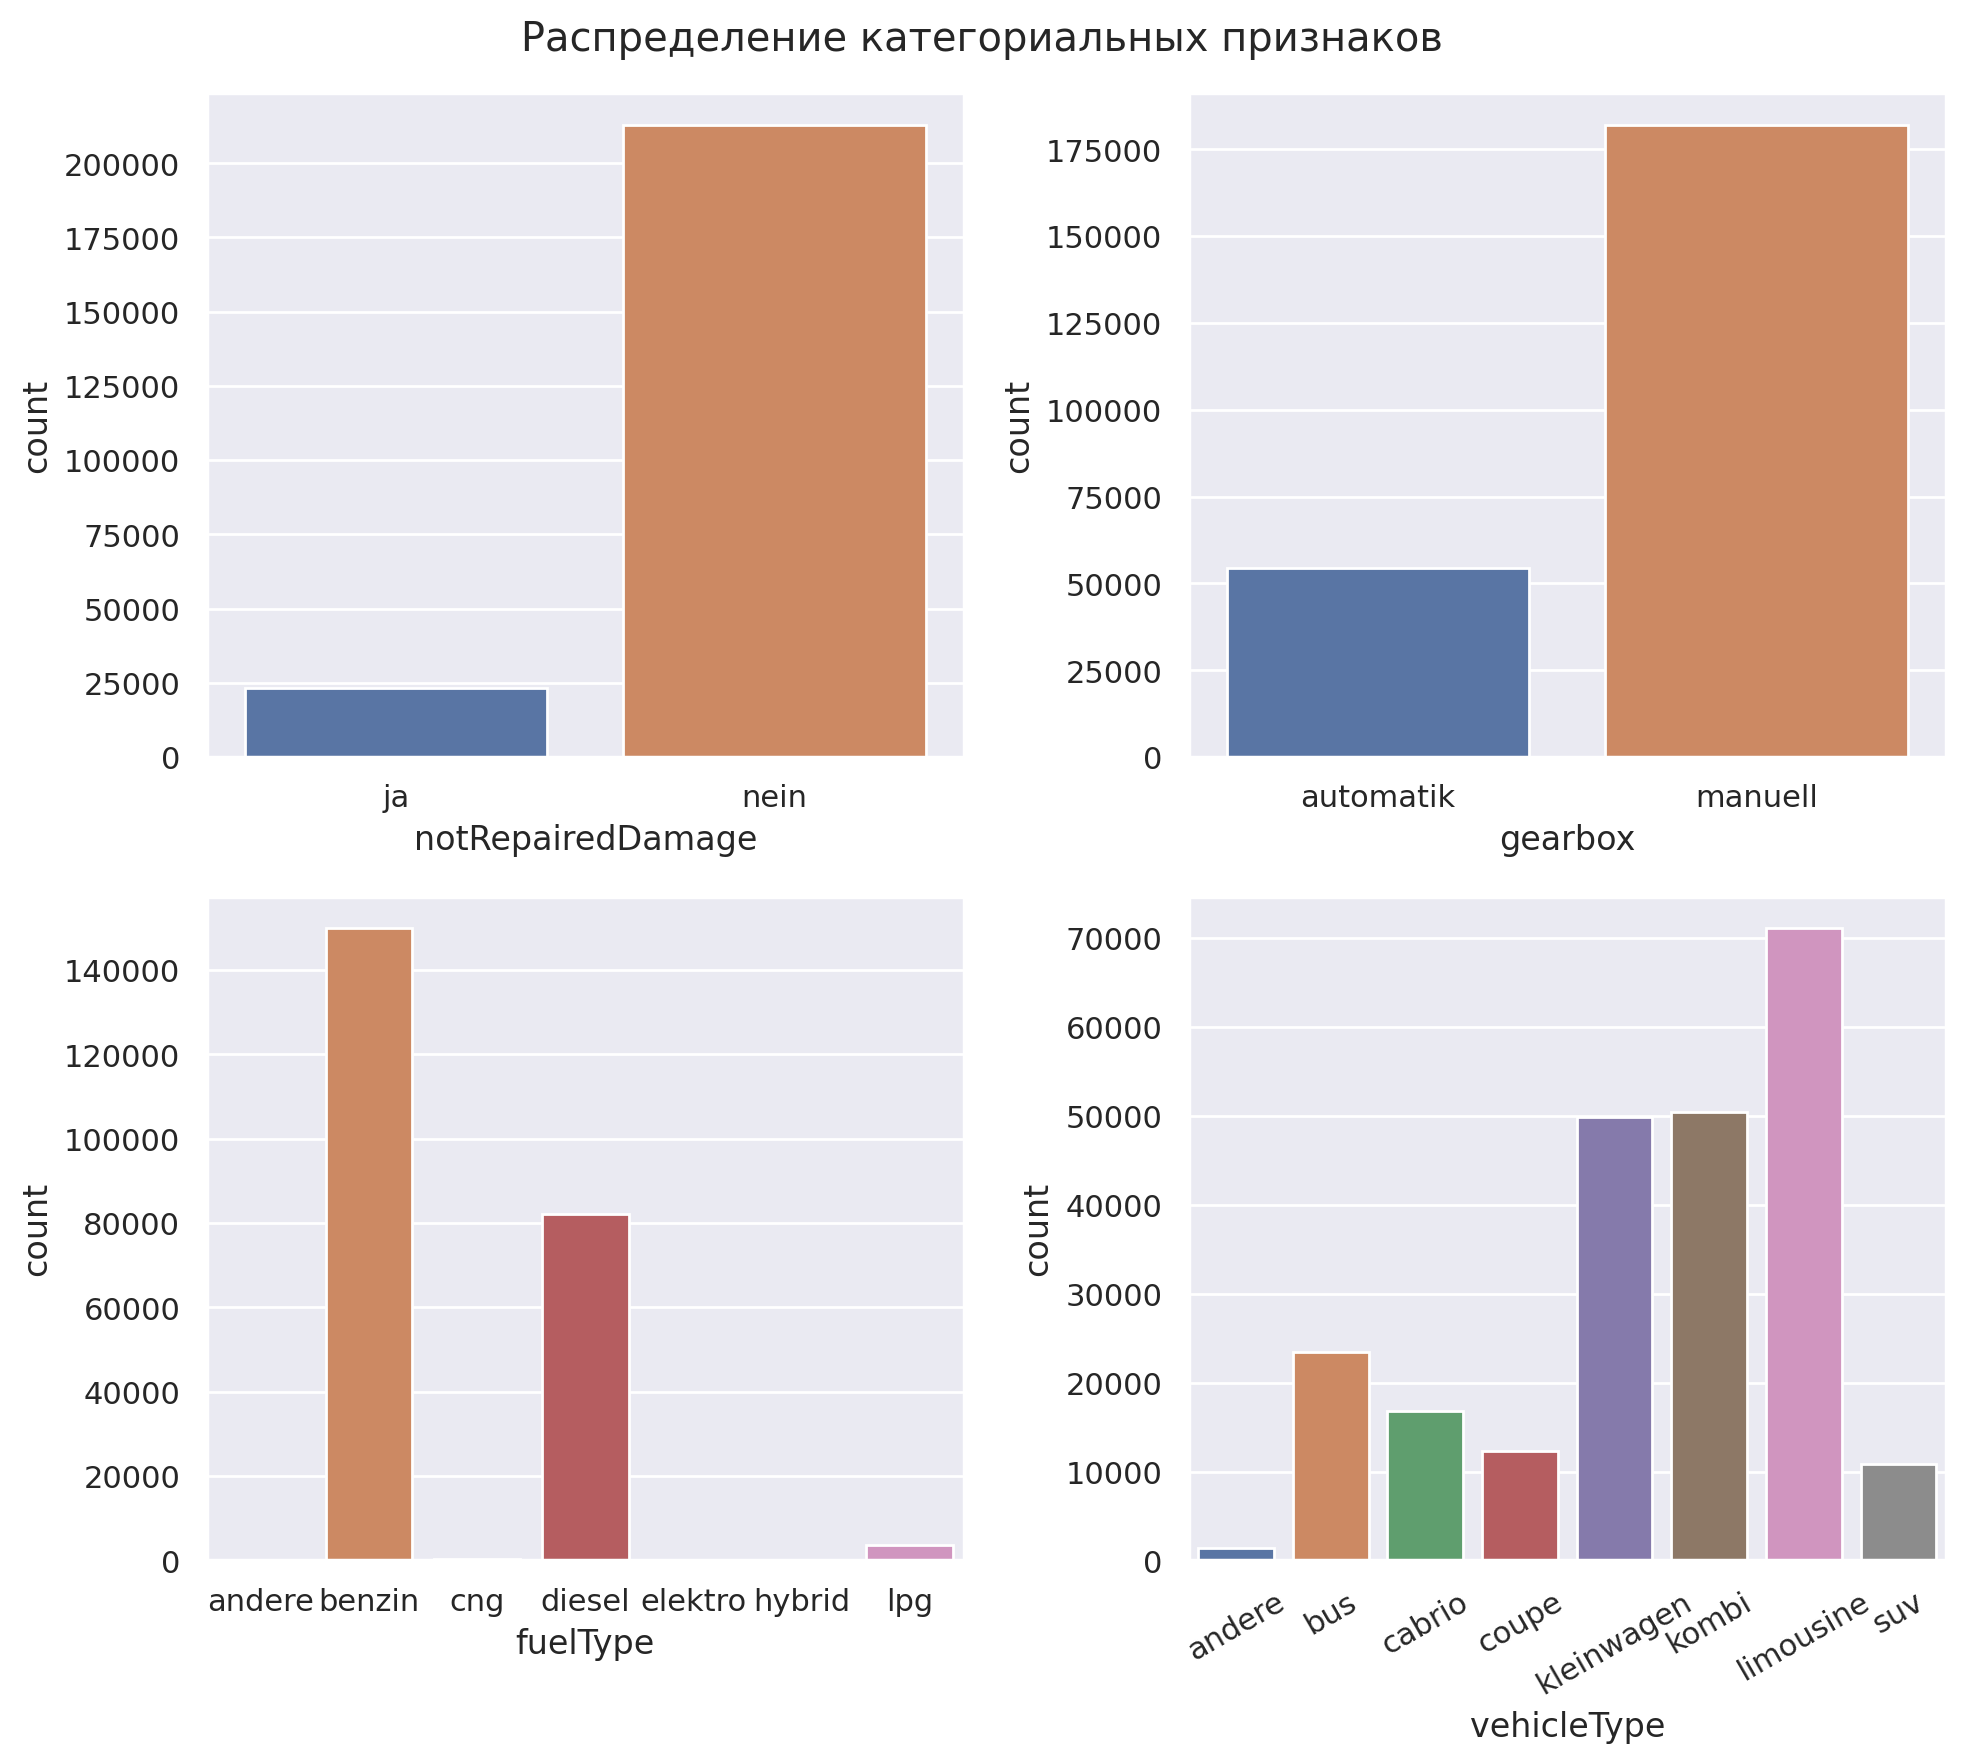

In [26]:
to_bar = ['notRepairedDamage', 'gearbox', 'fuelType', 'vehicleType'] # 'brand' отдльно
fig, ax = plt.subplots(2, 2, figsize = (10,9))
for i, subplots in zip(to_bar, ax.flatten()):
    sns.countplot(data, x = i, ax = subplots)
plt.xticks(rotation=30)
fig.suptitle('Распределение категориальных признаков')
plt.tight_layout()
plt.show()

в fuelType есть очень редкие значения

In [27]:
data['fuelType'].value_counts()

fuelType
benzin     149954
diesel      82048
lpg          3635
cng           429
hybrid        188
andere         31
elektro        28
Name: count, dtype: int64

Посмотрим на brand

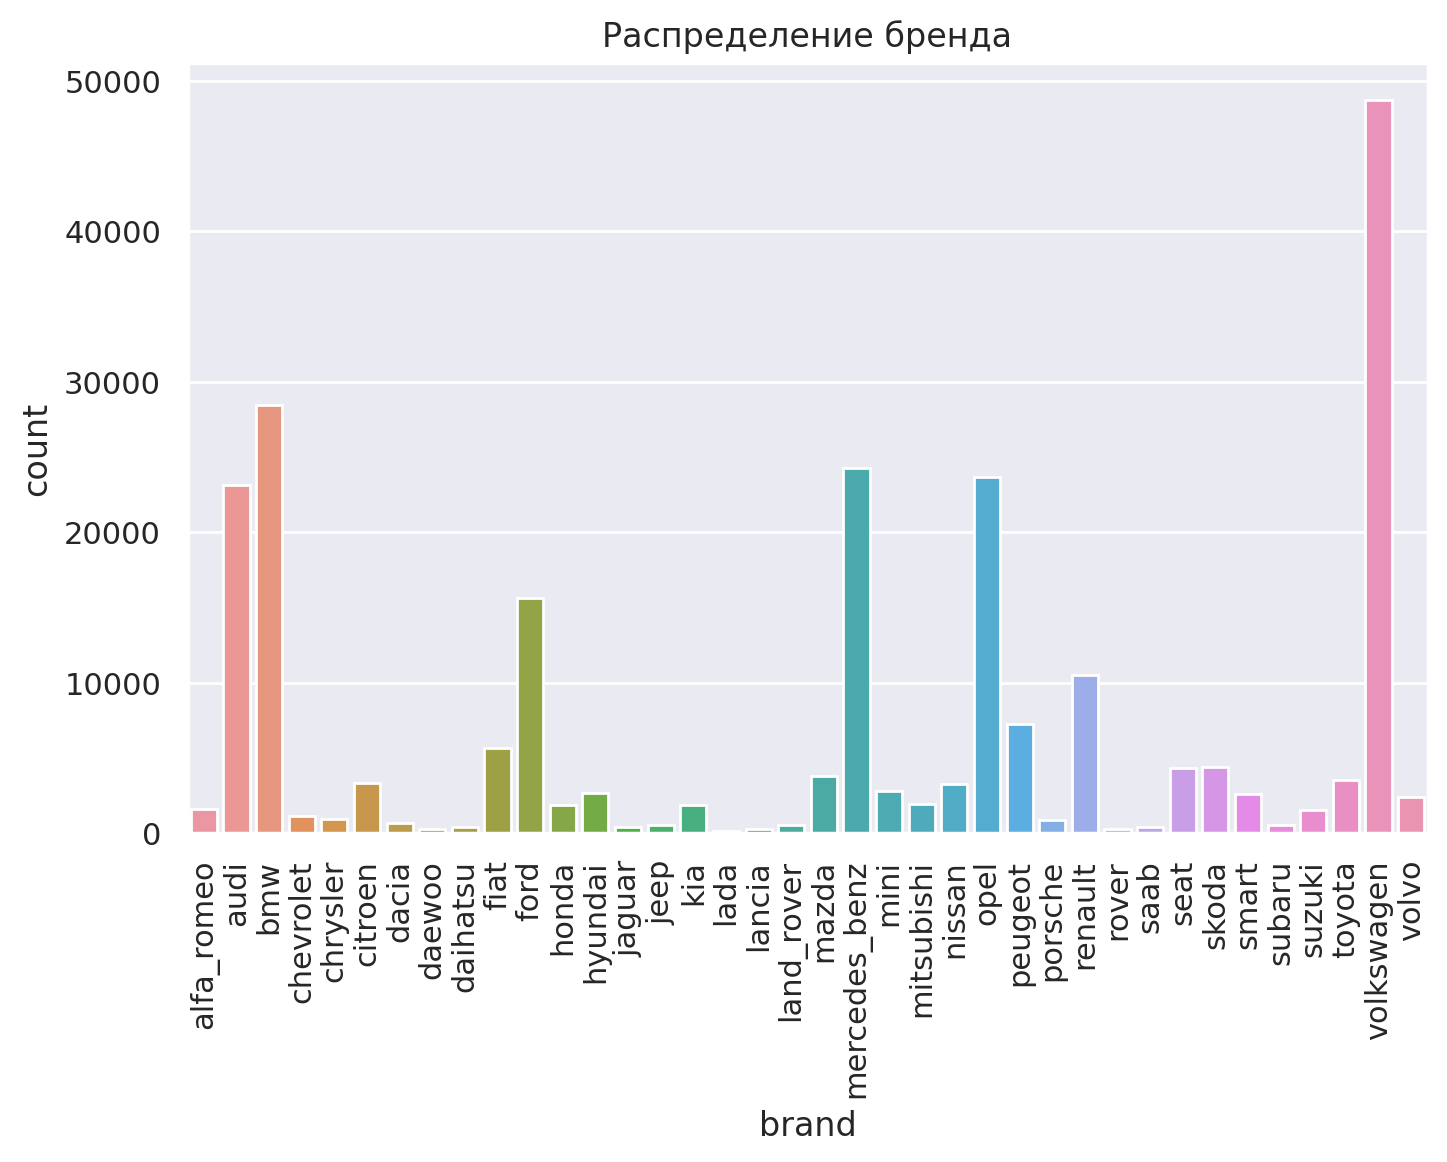

In [28]:
sns.countplot(data, x = 'brand')
plt.xticks(rotation=90)
plt.title('Распределение бренда')
plt.show()

Только не понимаю, как обрабатывать признак model. Пока вообще не буду использовать его

In [29]:
data['bias'] = 1
other = ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [31]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [32]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [33]:
from sklearn.metrics import r2_score

dim = X_train.shape[1]
descent_configs = [{
    'descent_name': des,
    'kwargs': {
         'dimension': dim,
         'lambda_': lambda_
    }
} for des in ['full', 'stochastic', 'momentum', 'adam'] for lambda_ in np.logspace(-5, 0, 15)]
#при lr > порядка единиц веса улетают в бесконечность

In [34]:
errs = pd.DataFrame(columns = ['method', 'lambda', 'r2_train', 'r2_val', 'loss_train', 'loss_val', 'n_iter'])
losses = {}

In [41]:
for i, config in enumerate(descent_configs):
    errs.loc[i, 'lambda'] = config['kwargs']['lambda_']
    errs.loc[i, 'method'] = config['descent_name']
    
    regression = LinearRegression(descent_config = config)
    regression.fit(X_train, y_train)
    y_pred = regression.predict(X_train)
    
    losses[config['descent_name'] + '|' + str(config['kwargs']['lambda_'])] = regression.loss_history
    errs.loc[i, 'n_iter'] = len(regression.loss_history) -1
    errs.loc[i, 'r2_train'] = r2_score(y_train, y_pred)
    errs.loc[i, 'loss_train'] = regression.descent.calc_loss(X_train, y_train)

    y_pred_val = regression.predict(X_val)
    errs.loc[i, 'r2_val'] = r2_score(y_val, y_pred_val)
    errs.loc[i, 'loss_val'] = regression.descent.calc_loss(X_val, y_val)

In [42]:
errs.head()# при маленьком шаге получалась 1 итерация, тк веса слабо менялись и выполнялся критерий остановки

method    lambda   r2_train     r2_val loss_train   loss_val n_iter
0   full   0.00001 -24.488898 -24.015536  32.208788  31.994499      1
1   full  0.000023 -18.545751 -18.253264   24.69879  24.624638      1
2   full  0.000052 -22.357054 -21.986965  29.514904  29.399987      1
3   full  0.000118 -24.517162 -24.093556  32.244503  32.094286      1
4   full  0.000268 -28.679564 -28.200376   37.50428  37.346847      1

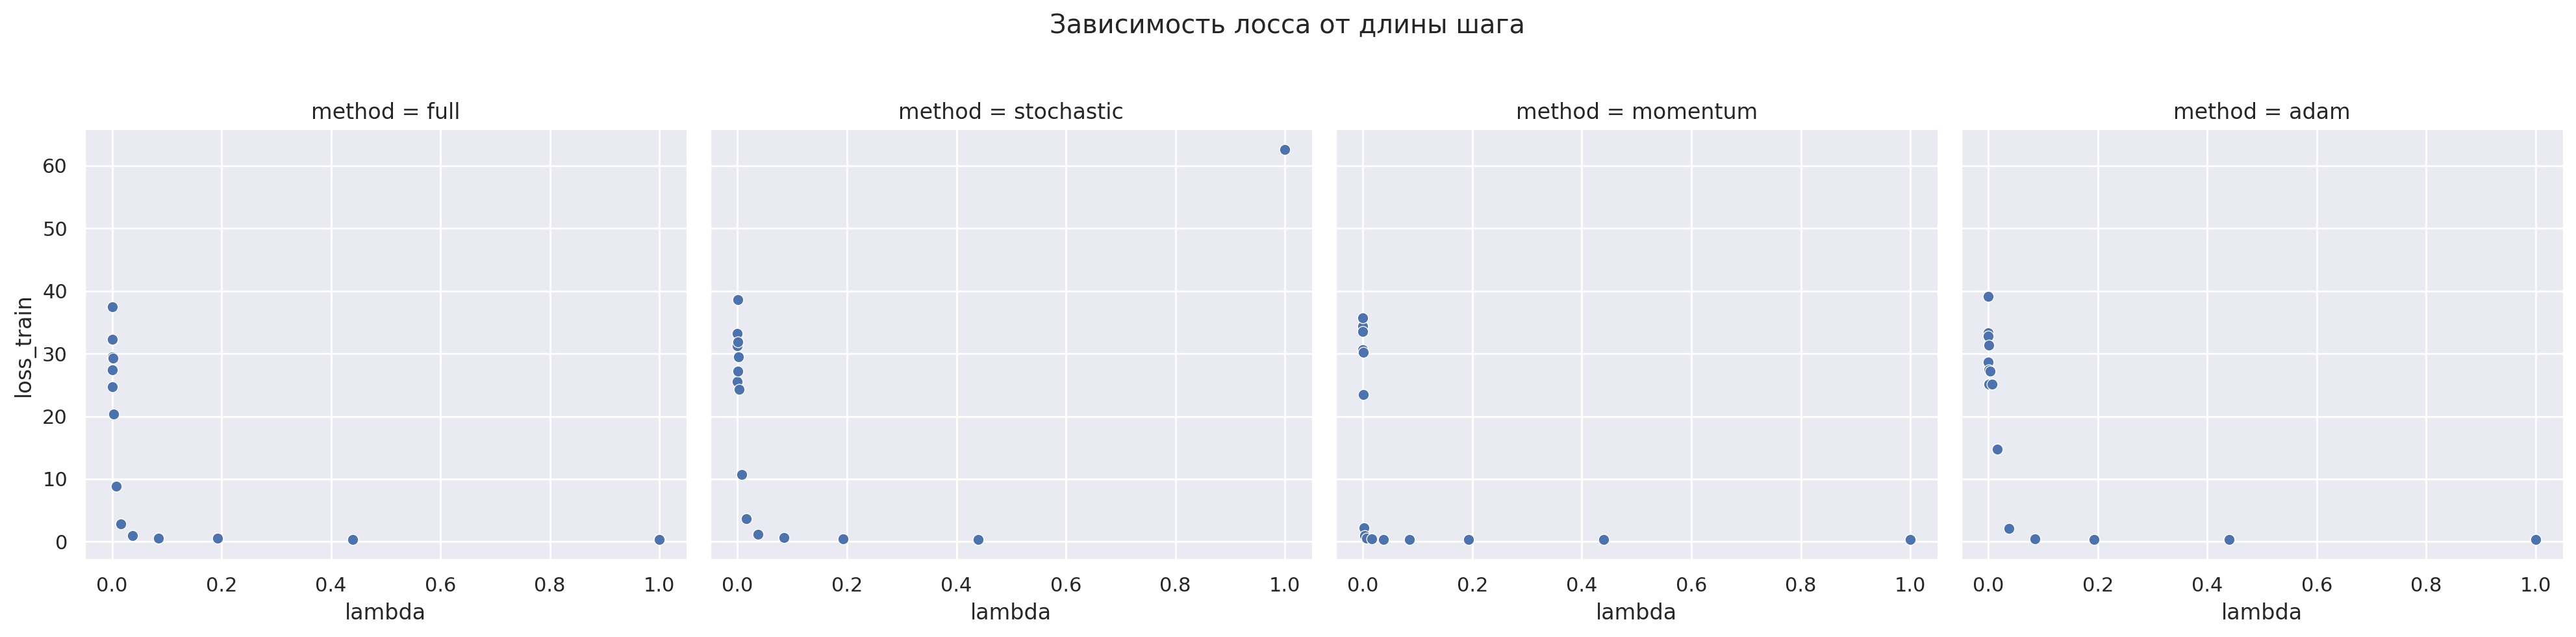

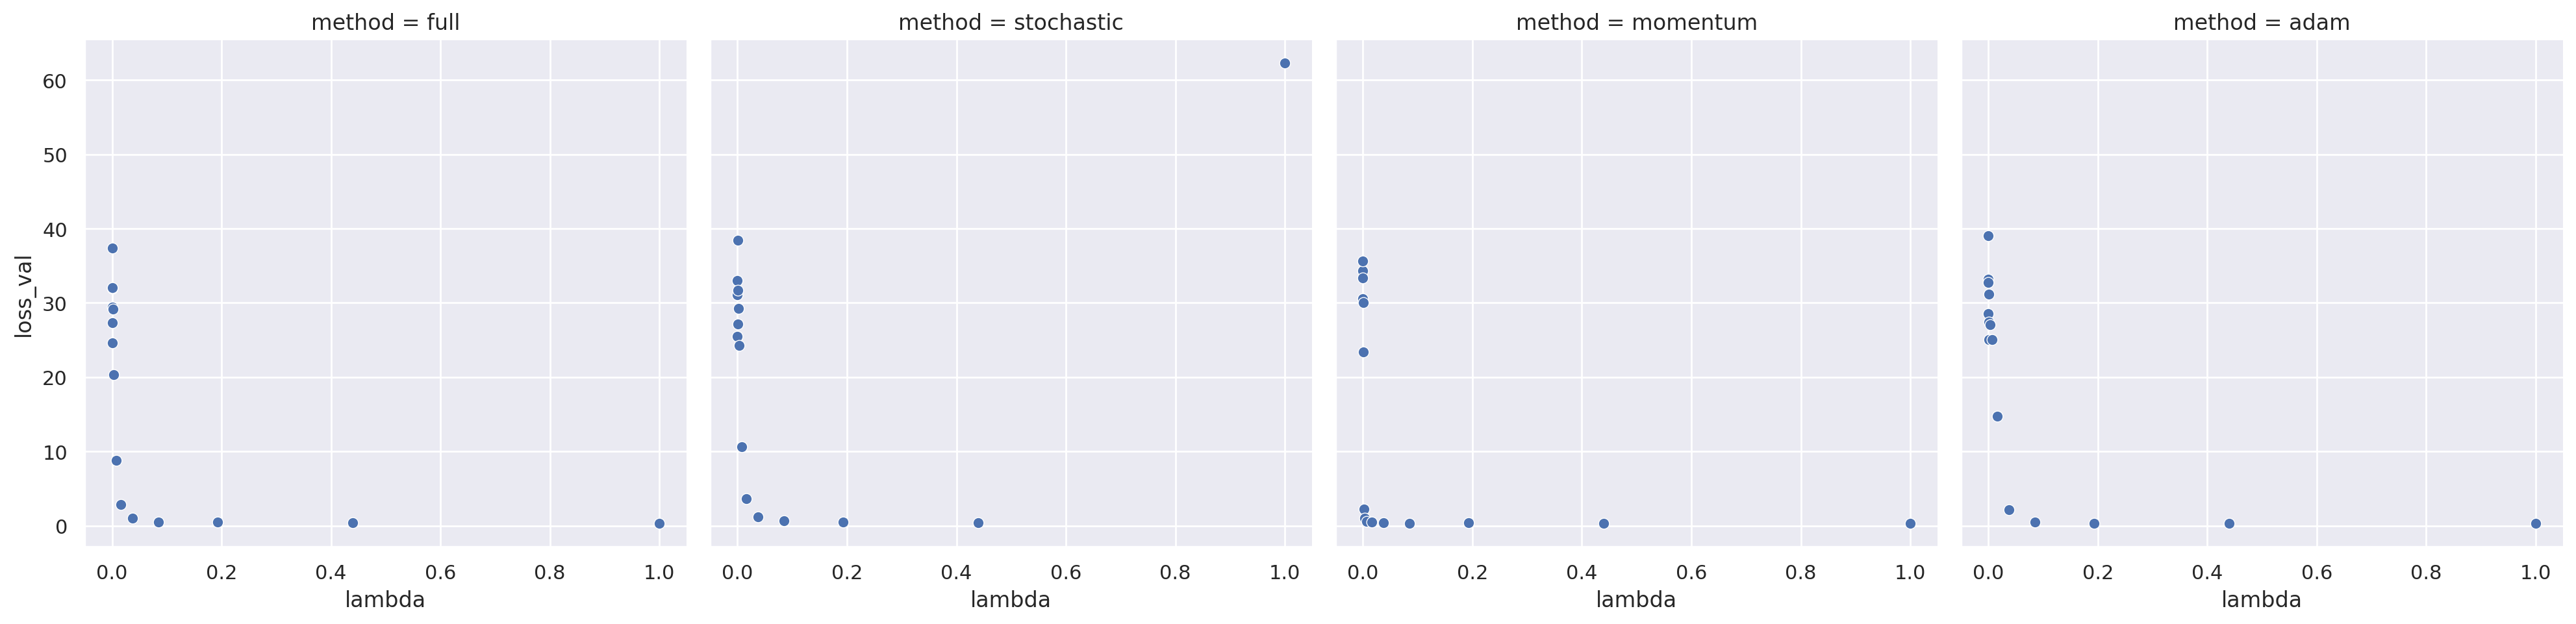

In [43]:
rel = sns.relplot(x='lambda', y='loss_train', col='method', data=errs, height = 5, aspect = 1);
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Зависимость лосса от длины шага')
rel2 = sns.relplot(x='lambda', y='loss_val', col='method', data=errs, height = 5, aspect = 1)

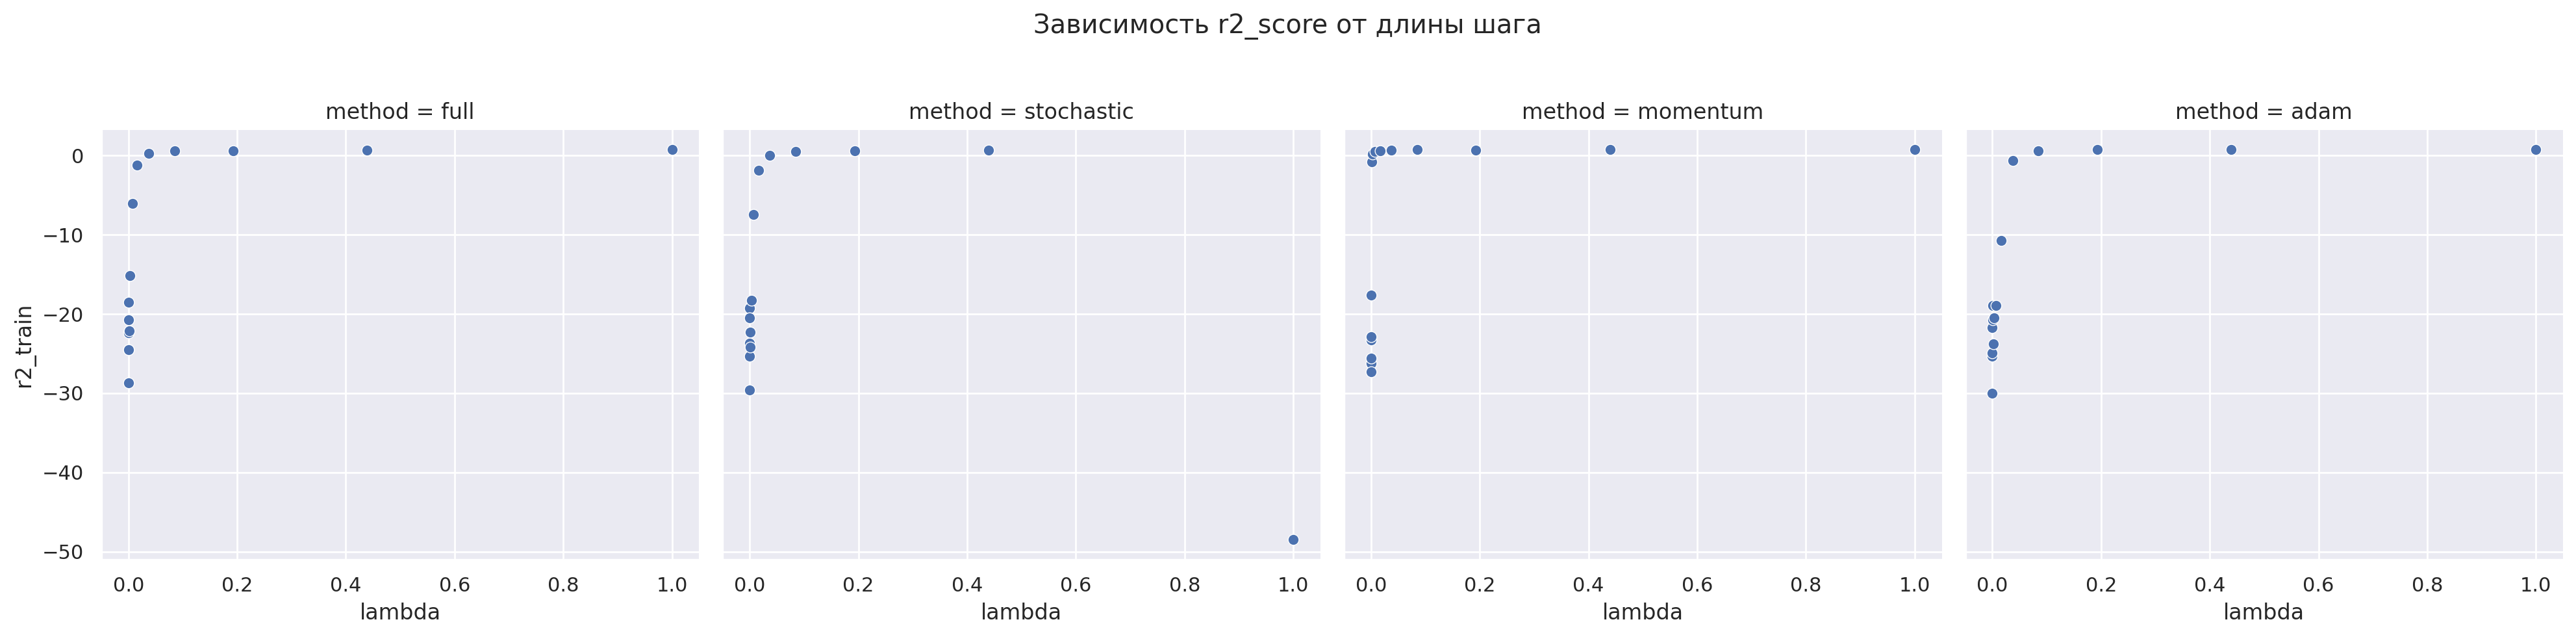

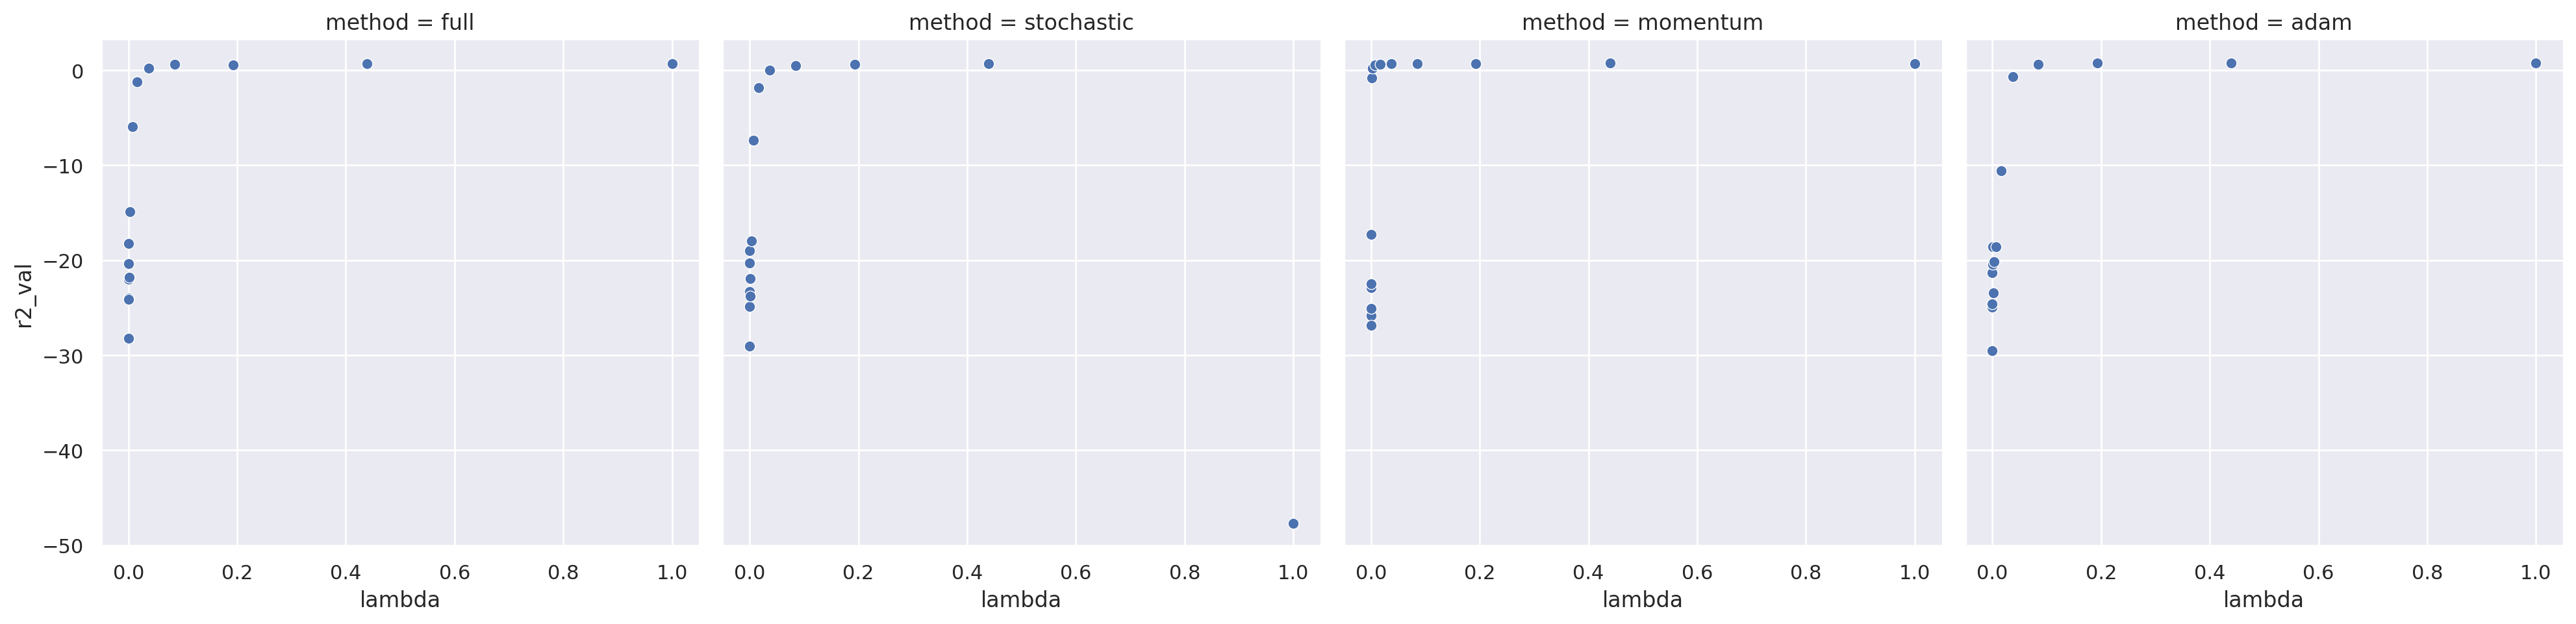

In [44]:
rel = sns.relplot(x='lambda', y='r2_train', col='method', data=errs, height = 5, aspect = 1);
rel.fig.subplots_adjust(top=.8)
rel.fig.suptitle('Зависимость r2_score от длины шага')
rel2 = sns.relplot(x='lambda', y='r2_val', col='method', data=errs, height = 5, aspect = 1);

Оптимальные пороги для каждого метода с точки зрения ошибки на валидации:

In [102]:
lambda_stochastic = errs[errs['loss_val'] == errs[errs['method'] == 'stochastic']['loss_val'].min()]['lambda'].values[0]
lambda_full= lambda_stochastic
lambda_momentum = errs[errs['loss_val'] == errs[errs['method'] == 'momentum']['loss_val'].min()]['lambda'].values[0]
lambda_adam = errs[errs['loss_val'] == errs[errs['method'] == 'adam']['loss_val'].min()]['lambda'].values[0]
print(lambda_stochastic, lambda_full, lambda_momentum, lambda_adam)

0.4393970560760795 0.4393970560760795 0.4393970560760795 0.4393970560760795


(больше 1 пробовал - там веса в бесконечность улетают)

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [99]:
# при оптимальном пороге:
loss_full = losses[f'full|{lambda_full}']
loss_stochastic = losses[f'stochastic|{lambda_stochastic}']
loss_momentum = losses[f'momentum|{lambda_momentum}']
loss_adam = losses[f'adam|{lambda_adam}']

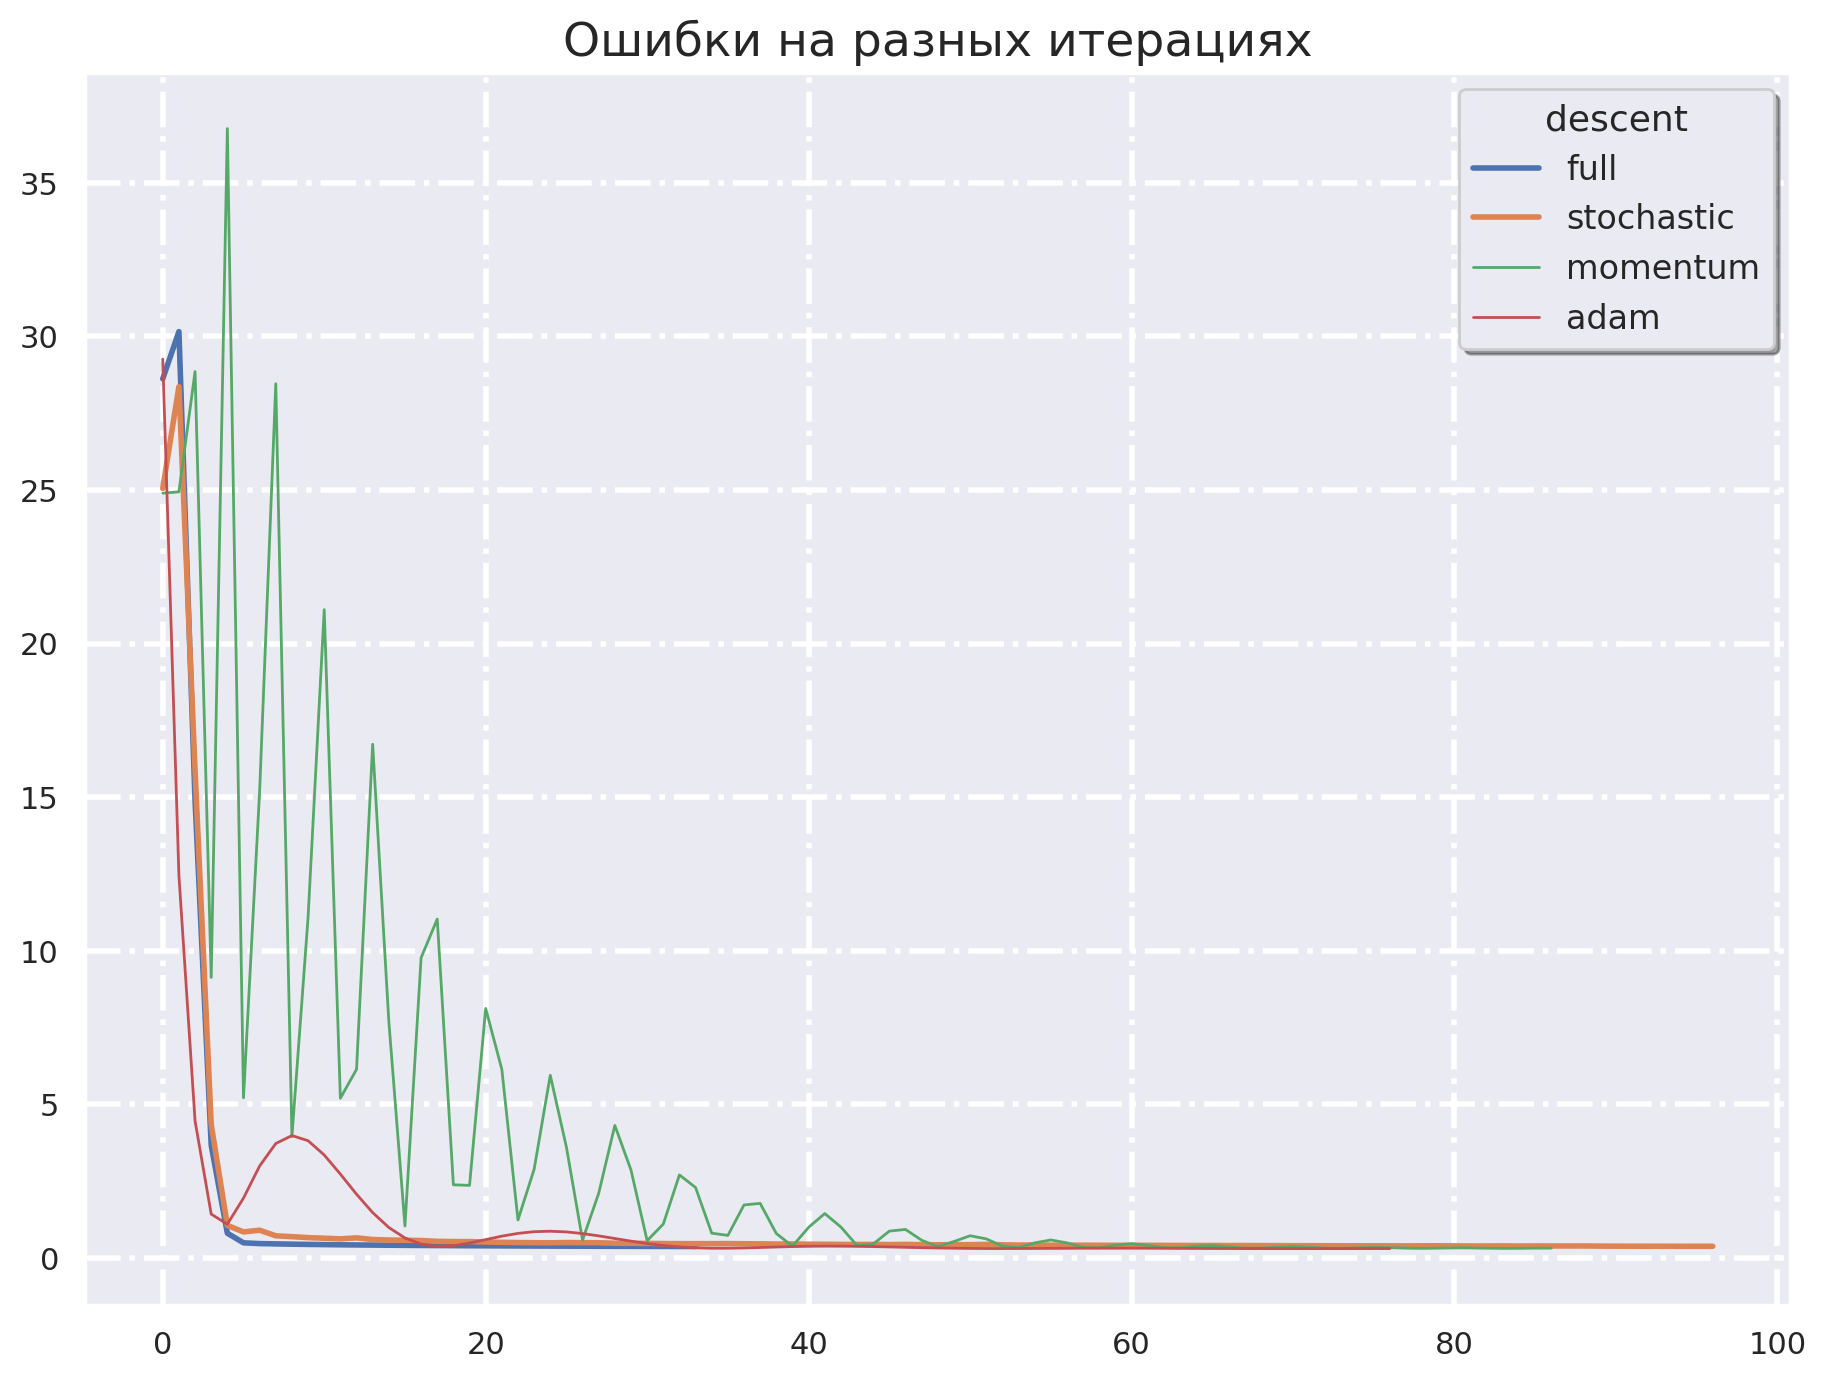

In [100]:
plt.figure(figsize = (11, 8))

plt.title('Ошибки на разных итерациях', fontsize=17)

plt.plot(np.arange(len(loss_full)), loss_full,
         linestyle = '-',
         linewidth = 2,
         label="full")
plt.plot(np.arange(len(loss_stochastic)), loss_stochastic,
         linestyle = '-',
         linewidth = 2,
         label="stochastic")
plt.plot(np.arange(len(loss_momentum)), loss_momentum,
         linestyle = '-',
         linewidth = 1,
         label="momentum")
plt.plot(np.arange(len(loss_adam)), loss_adam,
         linestyle = '-',
         linewidth = 1,
         label="adam")

plt.legend(title='descent',
           fontsize=12,
           title_fontsize=13,
           loc='upper right',
           shadow=True)

plt.grid(linestyle='-.', linewidth=2)
plt.show()

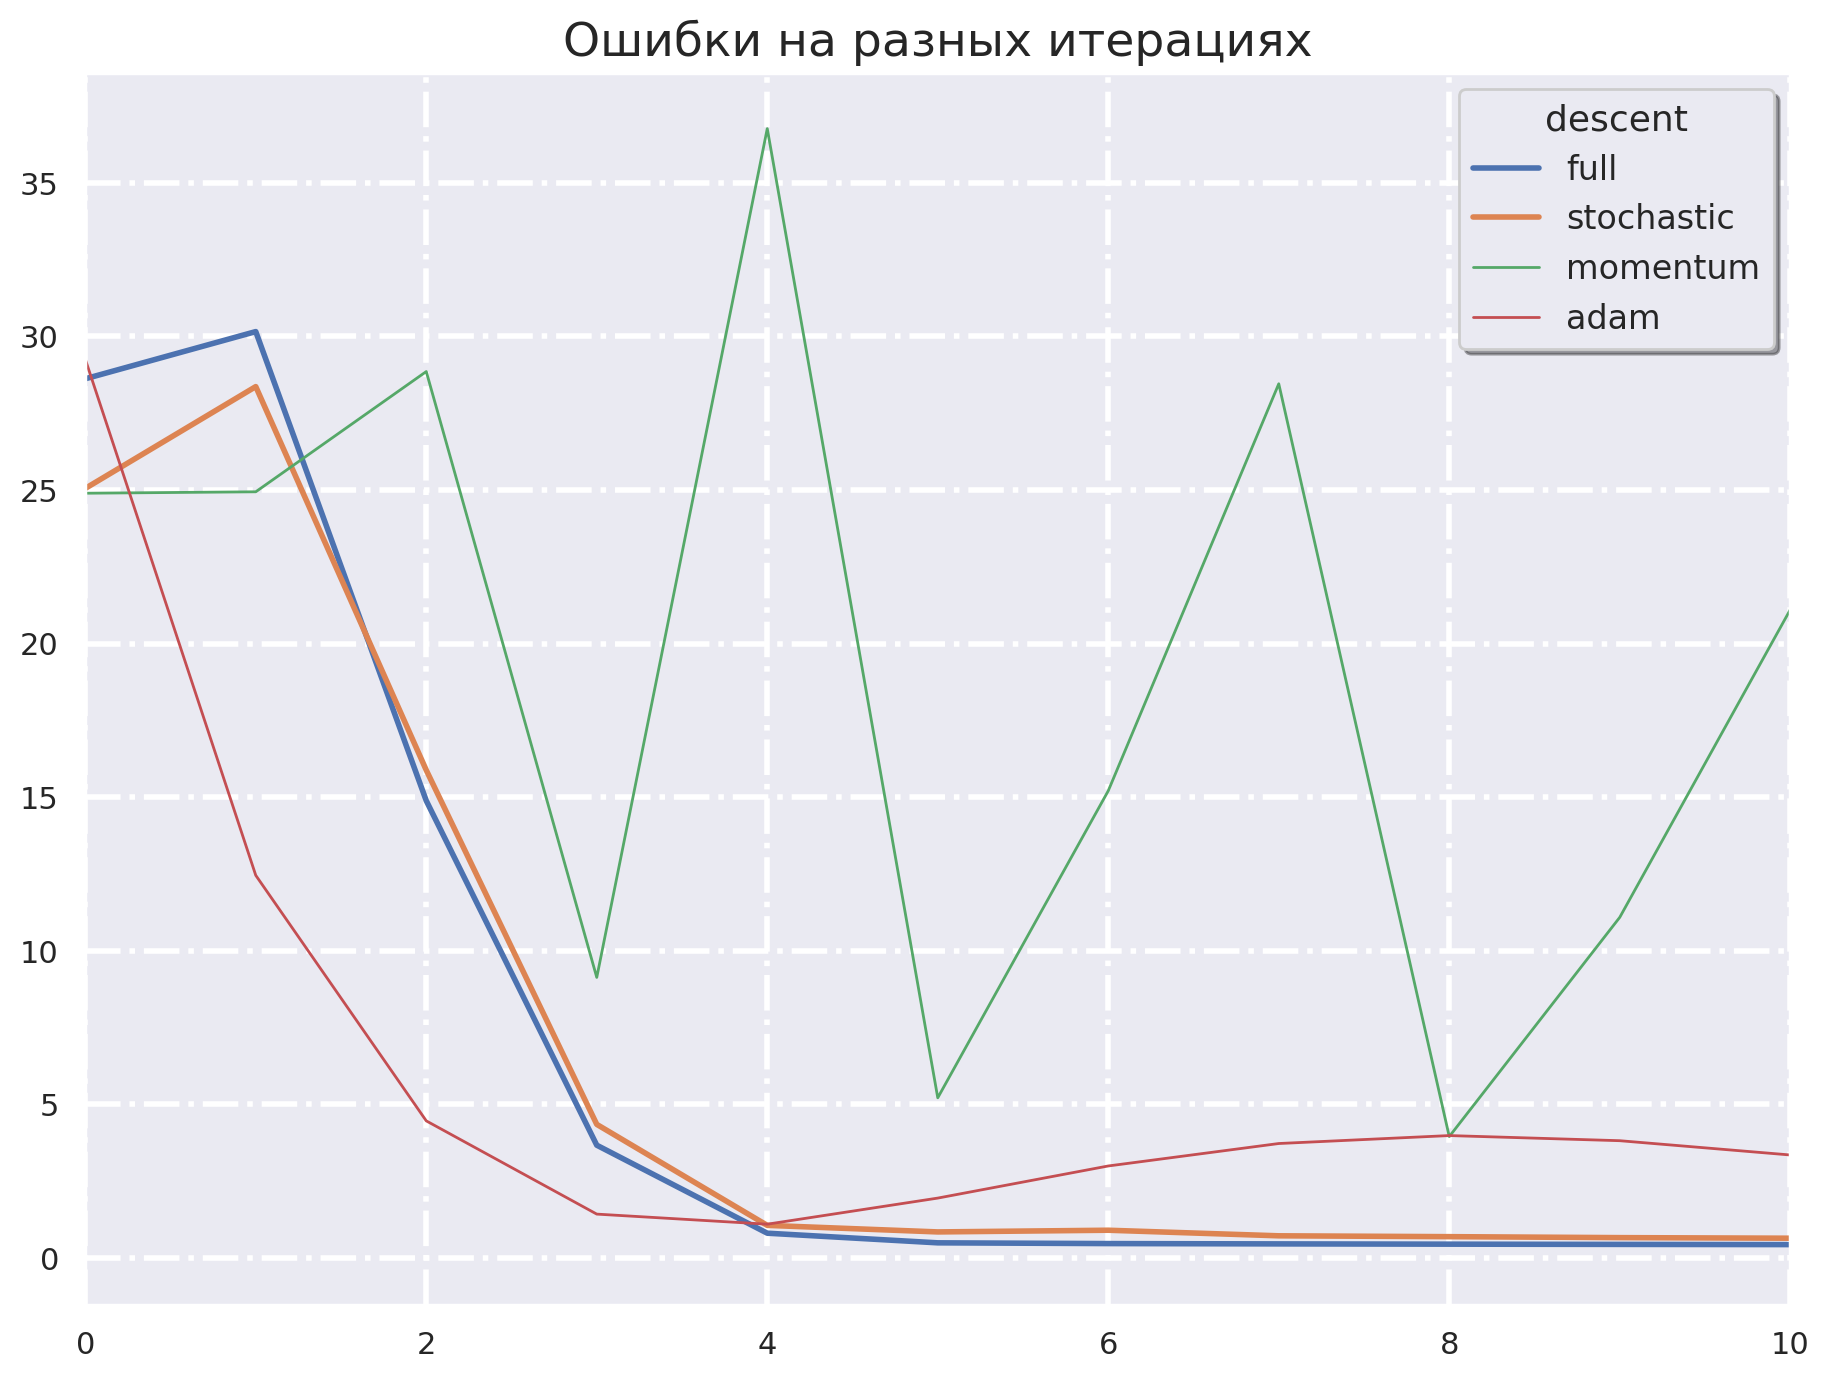

In [101]:
# покрупнее в начале
plt.figure(figsize = (11, 8))

plt.title('Ошибки на разных итерациях', fontsize=17)

plt.plot(np.arange(len(loss_full)), loss_full,
         linestyle = '-',
         linewidth = 2,
         label="full")
plt.plot(np.arange(len(loss_stochastic)), loss_stochastic,
         linestyle = '-',
         linewidth = 2,
         label="stochastic")
plt.plot(np.arange(len(loss_momentum)), loss_momentum,
         linestyle = '-',
         linewidth = 1,
         label="momentum")
plt.plot(np.arange(len(loss_adam)), loss_adam,
         linestyle = '-',
         linewidth = 1,
         label="adam")

plt.legend(title='descent',
           fontsize=12,
           title_fontsize=13,
           loc='upper right',
           shadow=True)

plt.grid(linestyle='-.', linewidth=2)
plt.xlim(0,10)
plt.show()

Полный спуск сходится быстро, но требует сложных вычислений. С данным размером батча градиент хорошо аппроксимируется подвыборкой в стохастическом методе. В методе с моментом ошибка скачет, несмотря на то, что момент подталквает менять весы в том же направлени, что и на прошлой итерации. У адама такой проблемы нет.

In [103]:
errs[errs['lambda'] == 0.4393970560760795]

method    lambda  r2_train    r2_val loss_train  loss_val n_iter
13        full  0.439397  0.707201  0.703718   0.369993  0.378941     33
28  stochastic  0.439397  0.701231  0.699017   0.377536  0.384952     96
43    momentum  0.439397  0.748176  0.744141   0.318214   0.32724     86
58        adam  0.439397  0.759845  0.756217    0.30347  0.311795     76

У momentum и adam качество чуть получше. Полный спуск сходится пораньше.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [111]:
dim = X_train.shape[1]
batch_sizes = np.arange(5, 500, 10)

stoch_configs = [{
    'descent_name': 'stochastic',
    'kwargs': {
         'dimension': dim,
         'lambda_': 0.2,
         'batch_size': bs
         
    }
} for bs in batch_sizes]

In [121]:
stoch = pd.DataFrame(columns = ['time', 'n_iter'])

In [125]:
k = 10
import time

for config in stoch_configs: 
    stoch.loc[config['kwargs']['batch_size'], 'n_iter'] = 0

    start = time.process_time()
    for it in range(k):
        regression = LinearRegression(descent_config = config)
        regression.fit(X_train, y_train)
        stoch.loc[config['kwargs']['batch_size'], 'n_iter'] += len(regression.loss_history) -1
        
    stoch.loc[config['kwargs']['batch_size'], 'time'] = (time.process_time() - start)/k
    stoch.loc[config['kwargs']['batch_size'], 'n_iter'] /=k

In [127]:
stoch = stoch.reset_index(names = ['batch_size'])

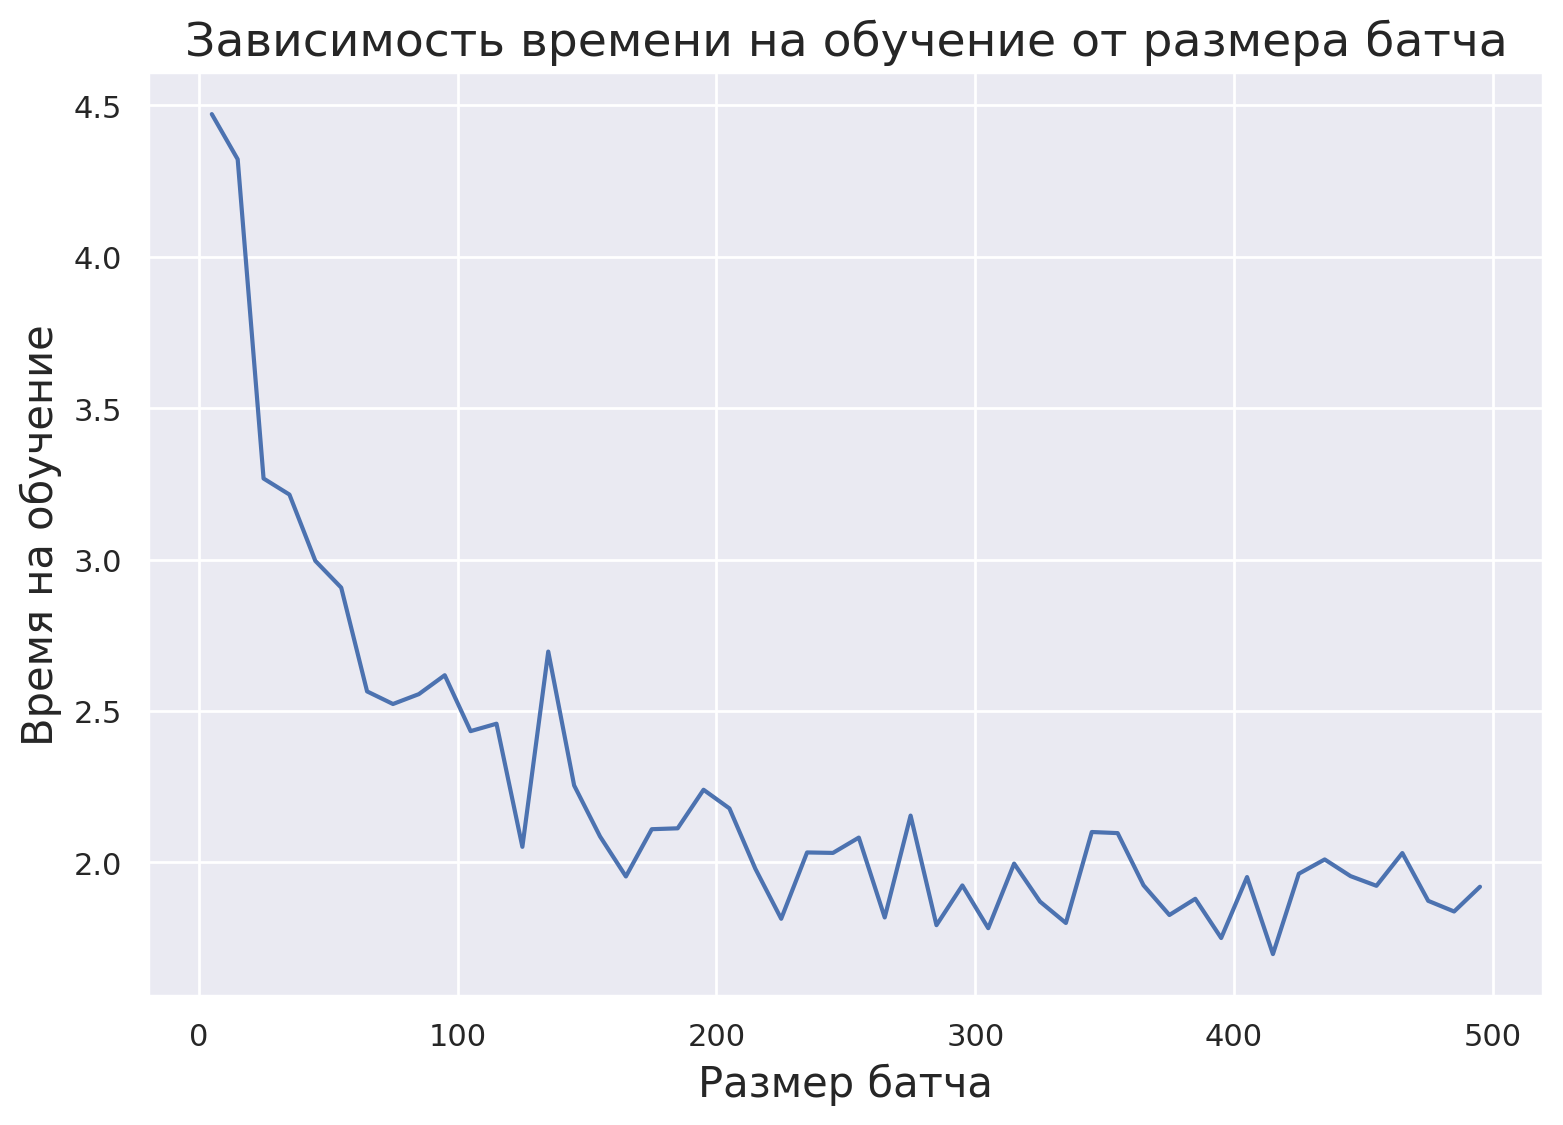

In [132]:
plt.figure(figsize = (9, 6))
plt.plot(stoch['batch_size'], stoch['time'])
plt.title('Зависимость времени на обучение от размера батча', fontsize=17)

plt.xlabel('Размер батча', fontsize=15)
plt.ylabel('Время на обучение', fontsize=15)
plt.show()

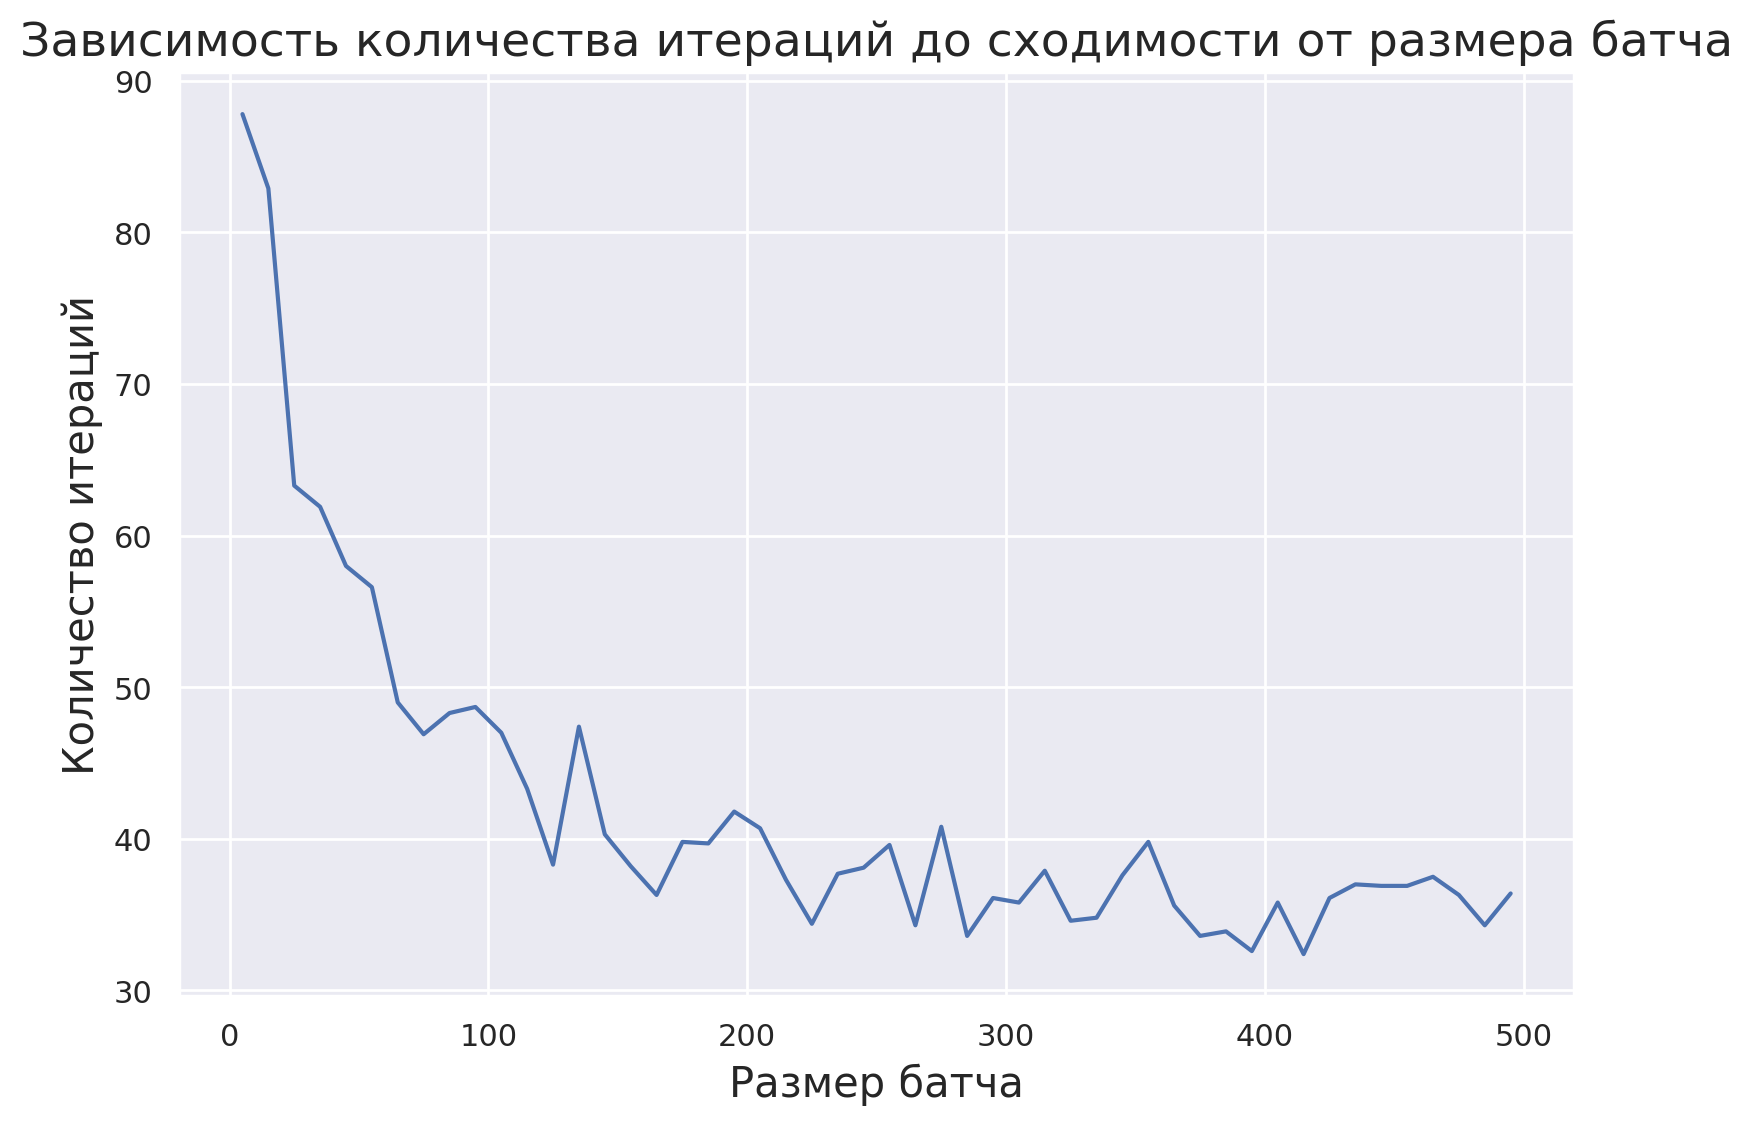

In [133]:
plt.figure(figsize = (9, 6))
plt.plot(stoch['batch_size'], stoch['n_iter'])
plt.title('Зависимость количества итераций до сходимости от размера батча', fontsize=17)

plt.xlabel('Размер батча', fontsize=15)
plt.ylabel('Количество итераций', fontsize=15)
plt.show()

При большом размере батча градиент аппроксимируется лучше, итераций нужно меньше.\
Графики повторяют друг друга по форме. Получается, что усложнение вычислений не существенное. За счет снижения количества итераций снижается время.\
Оптимально взять где-нибудь 400, тк видимо по такому размеру не сложно вычислять градиент + достаточно быстро сходится(дальше n_iter не уменьшается).

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/96156920/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

1. Подбор лучших параметров

In [94]:
from sklearn.metrics import r2_score

dim = X_train.shape[1]
descent_configs = [{
    'descent_name': des,
    'regularized': 'True',
    'kwargs': {
         'dimension': dim,
         'lambda_': lambda_,
         'mu': mu
    }
} for des in ['full', 'stochastic', 'momentum', 'adam'] for lambda_ in np.logspace(-5, 0, 7) for mu in np.logspace(-5, 2, 10)]

In [95]:
errs = pd.DataFrame(columns = ['method', 'mu', 'lambda', 'r2_train', 'r2_val', 'loss_train', 'loss_val', 'n_iter'])
losses = {}

In [96]:
for i, config in enumerate(descent_configs):
    errs.loc[i, 'lambda'] = config['kwargs']['lambda_']
    errs.loc[i, 'mu'] = config['kwargs']['mu']
    errs.loc[i, 'method'] = config['descent_name'] +'_reg'
    
    regression = LinearRegression(descent_config = config)
    regression.fit(X_train, y_train)
    y_pred = regression.predict(X_train)
    
    losses[config['descent_name'] + '|' + str(config['kwargs']['lambda_'])
                                  + '|' + str(config['kwargs']['mu'])] = regression.loss_history
    errs.loc[i, 'n_iter'] = len(regression.loss_history) -1
    errs.loc[i, 'r2_train'] = r2_score(y_train, y_pred)
    errs.loc[i, 'loss_train'] = regression.descent.calc_loss(X_train, y_train)

    y_pred_val = regression.predict(X_val)
    errs.loc[i, 'r2_val'] = r2_score(y_val, y_pred_val)
    errs.loc[i, 'loss_val'] = regression.descent.calc_loss(X_val, y_val)
    if i%50 ==0:
        print(round(i/len(descent_configs),2)*100, '%')

0.0 %
18.0 %


/home/nikita/ML_fall_2023/HW3/descents.py:78: RuntimeWarning: overflow encountered in matmul
  return (y-x@self.w) @ (y-x@self.w).T /y.shape[0]
/home/nikita/ML_fall_2023/ml_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/home/nikita/ML_fall_2023/HW3/descents.py:78: RuntimeWarning: overflow encountered in matmul
  return (y-x@self.w) @ (y-x@self.w).T /y.shape[0]
/home/nikita/ML_fall_2023/ml_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/home/nikita/ML_fall_2023/HW3/descents.py:78: RuntimeWarning: overflow encountered in matmul
  return (y-x@self.w) @ (y-x@self.w).T /y.shape[0]


36.0 %


/home/nikita/ML_fall_2023/HW3/descents.py:78: RuntimeWarning: overflow encountered in matmul
  return (y-x@self.w) @ (y-x@self.w).T /y.shape[0]
/home/nikita/ML_fall_2023/ml_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/home/nikita/ML_fall_2023/HW3/descents.py:78: RuntimeWarning: overflow encountered in matmul
  return (y-x@self.w) @ (y-x@self.w).T /y.shape[0]
/home/nikita/ML_fall_2023/ml_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/home/nikita/ML_fall_2023/HW3/descents.py:78: RuntimeWarning: overflow encountered in matmul
  return (y-x@self.w) @ (y-x@self.w).T /y.shape[0]


54.0 %
71.0 %


/home/nikita/ML_fall_2023/HW3/descents.py:78: RuntimeWarning: overflow encountered in matmul
  return (y-x@self.w) @ (y-x@self.w).T /y.shape[0]
/home/nikita/ML_fall_2023/ml_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/home/nikita/ML_fall_2023/HW3/descents.py:78: RuntimeWarning: overflow encountered in matmul
  return (y-x@self.w) @ (y-x@self.w).T /y.shape[0]
/home/nikita/ML_fall_2023/ml_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/home/nikita/ML_fall_2023/HW3/descents.py:78: RuntimeWarning: overflow encountered in matmul
  return (y-x@self.w) @ (y-x@self.w).T /y.shape[0]


89.0 %


In [135]:
errs.head()

method        mu   lambda   r2_train     r2_val loss_train   loss_val  \
0  full_reg   0.00001  0.00001 -30.382833 -29.973998  39.656599  39.615283   
1  full_reg   0.00006  0.00001 -30.239168 -29.747148  39.475058  39.325146   
2  full_reg  0.000359  0.00001 -23.817489 -23.400221  31.360369  31.207521   
3  full_reg  0.002154  0.00001 -27.773532 -27.305359  36.359382  36.202134   
4  full_reg  0.012915  0.00001 -25.591285 -25.216052  33.601808  33.529941   

  n_iter  
0      1  
1      1  
2      1  
3      1  
4      1

Зависимость от mu при разных lambda для разных алгоритмов

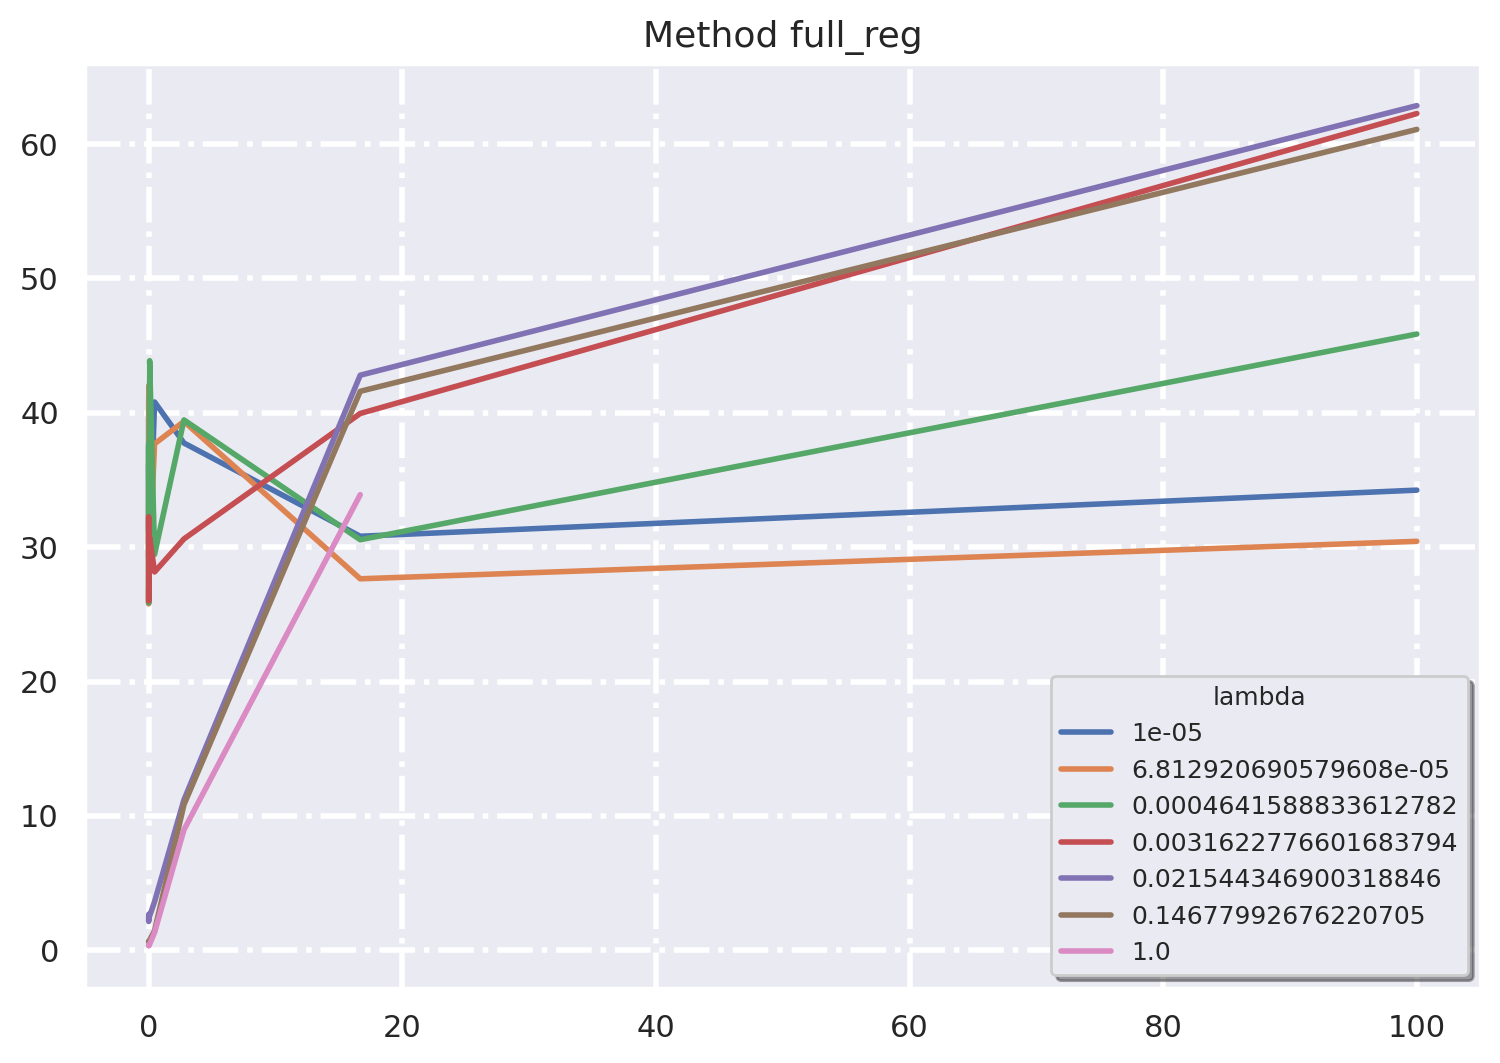

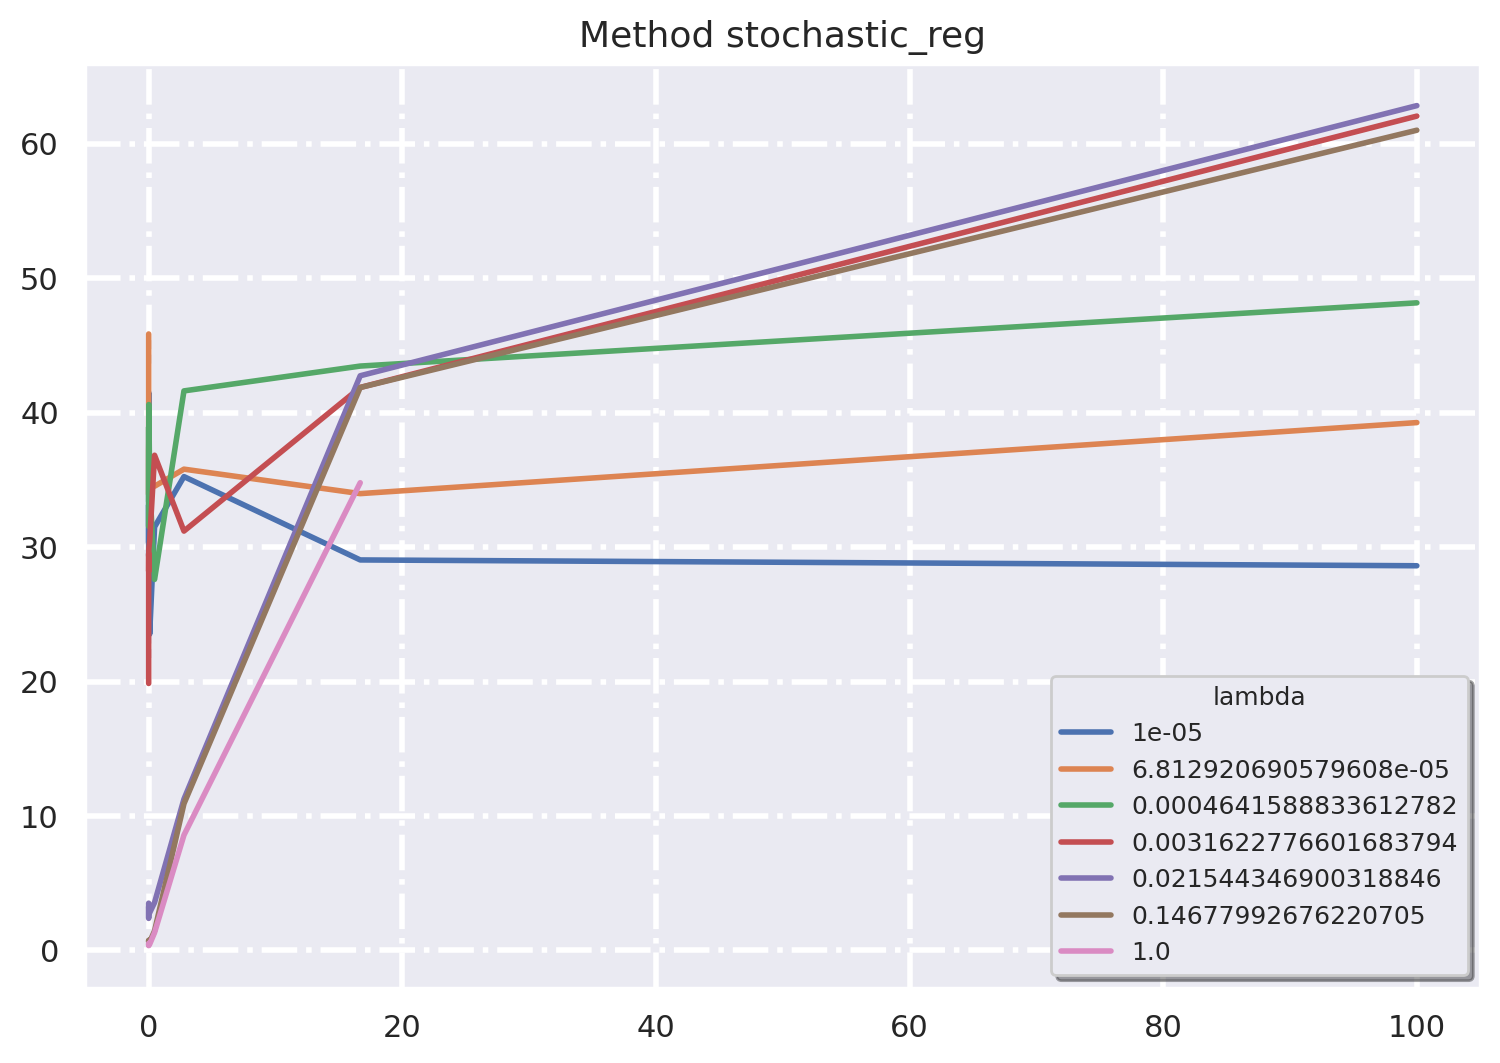

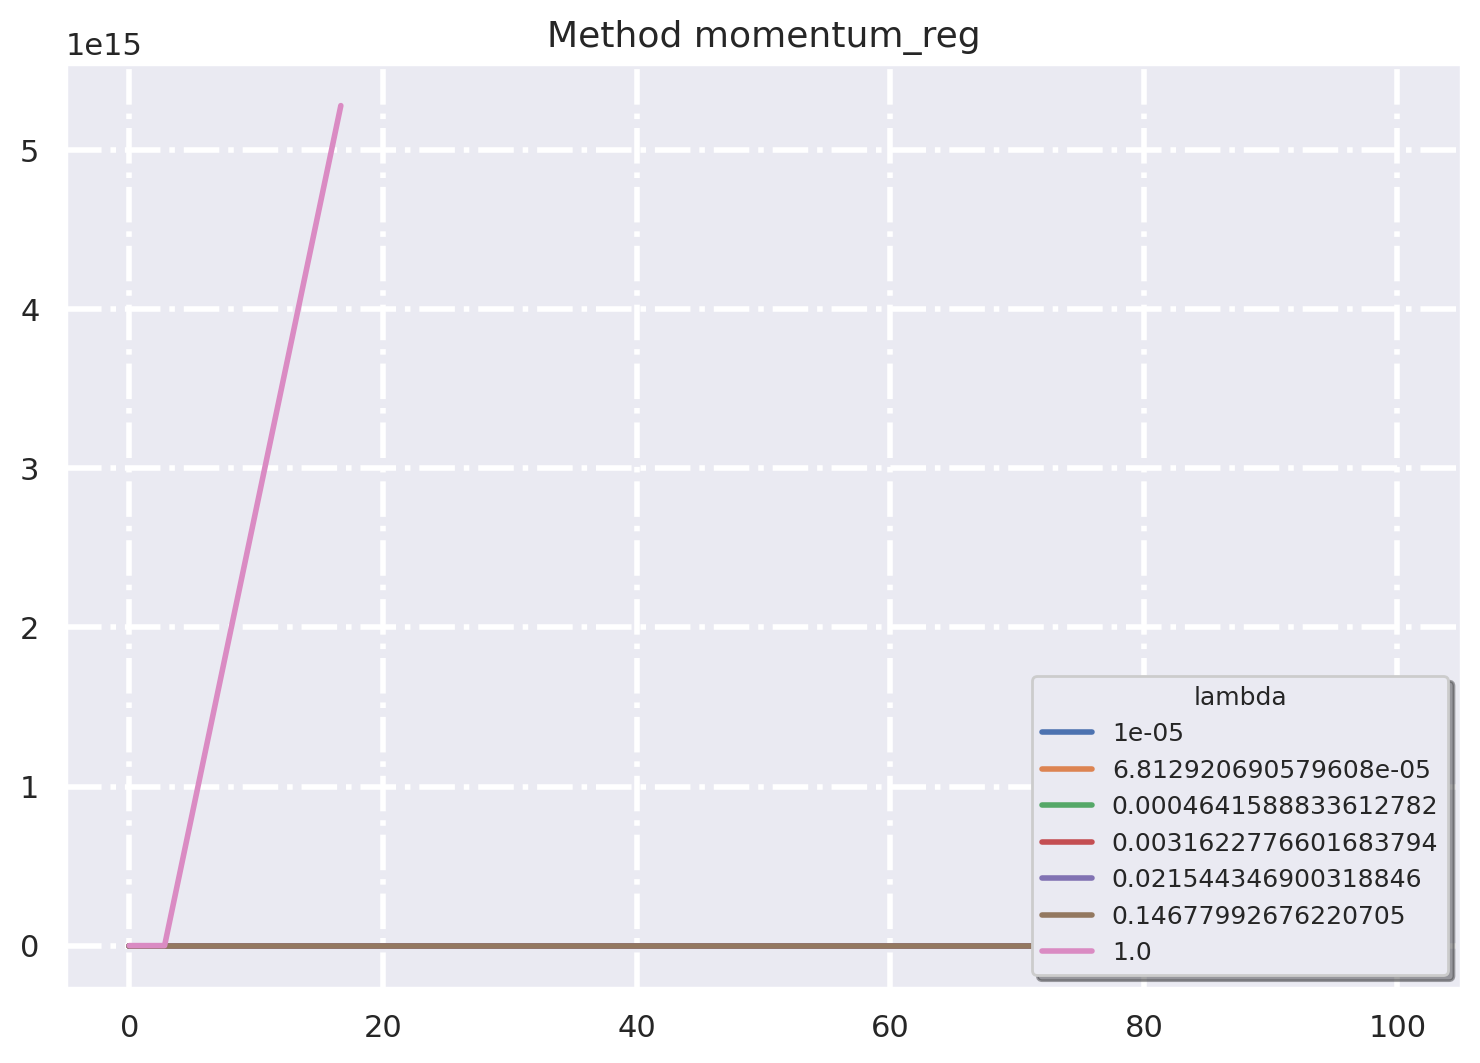

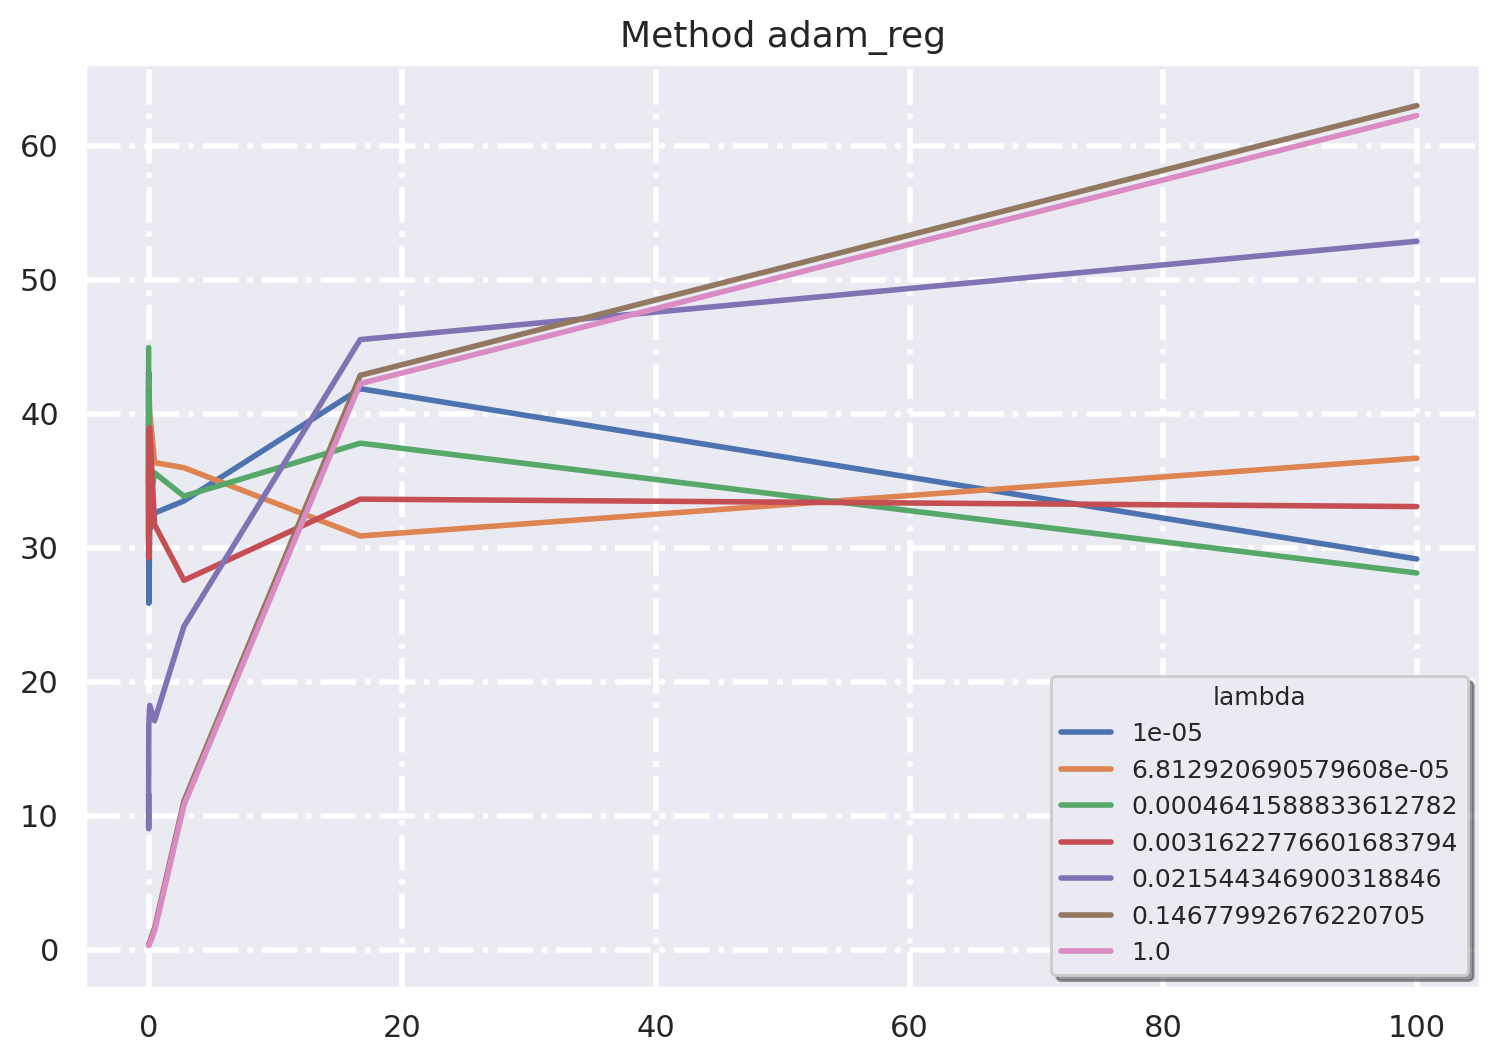

In [166]:
for i in errs['method'].unique():
    df = errs[errs['method']==i]
    plt.figure(figsize = (9, 6))    
    plt.title(f'Method {i}', fontsize=13)
    for lam in df['lambda'].unique():
        lam_df = df[df['lambda'] == lam]
        plt.plot(lam_df['mu'], lam_df['loss_val'],
                 linestyle = '-',
                 linewidth = 2,
                 label=f"{lam}")
    
    plt.legend(title='lambda',
               fontsize=9,
               title_fontsize=9,
               loc='lower right',
               shadow=True)
    
    plt.grid(linestyle='-.', linewidth=2)

сложно как-то анализировать, просто выберем наилучшие параметры:

In [168]:
stoch_mu, stoch_lambda = errs[errs['r2_val'] == errs[errs['method'] == 'stochastic_reg']['r2_val'].max()][['mu', 'lambda']].values[0]
momentum_mu, momentum_lambda = errs[errs['r2_val'] == errs[errs['method'] == 'momentum_reg']['r2_val'].max()][['mu', 'lambda']].values[0]
full_mu, full_lambda = errs[errs['r2_val'] == errs[errs['method'] == 'full_reg']['r2_val'].max()][['mu', 'lambda']].values[0]
adam_mu, adam_lambda = errs[errs['r2_val'] == errs[errs['method'] == 'adam_reg']['r2_val'].max()][['mu', 'lambda']].values[0]
print('mu', stoch_mu, momentum_mu, full_mu, adam_mu)
print('lambda', stoch_lambda, momentum_lambda, full_lambda, adam_lambda)

mu 0.0021544346900318843 0.0021544346900318843 5.994842503189409e-05 0.00035938136638046257
lambda 1.0 1.0 1.0 1.0


In [170]:
errs[(errs['mu'] == 0.0021544346900318843) & (errs['method'] == 'full_reg')]

method        mu    lambda   r2_train     r2_val loss_train   loss_val  \
3   full_reg  0.002154   0.00001 -27.773532 -27.305359  36.359382  36.202134   
13  full_reg  0.002154  0.000068 -21.239545 -20.958056  28.102775  28.084027   
23  full_reg  0.002154  0.000464 -28.828703 -28.327082  37.692739  37.508903   
33  full_reg  0.002154  0.003162 -20.332565 -20.012662   26.95668  26.874882   
43  full_reg  0.002154  0.021544  -0.701294  -0.678227   2.149823   2.146428   
53  full_reg  0.002154   0.14678   0.486621   0.491489   0.648726   0.650377   
63  full_reg  0.002154       1.0   0.715145   0.710601   0.359954   0.370137   

   n_iter  
3       1  
13      1  
23      1  
33     32  
43     76  
53     40  
63     57

С ругуляризацей большой lambda - это хорошо. Возможно стоило попробовать еще побольше

2. Сравним лушие версии каждого алгоритма с регуляризацией и без

In [70]:
no_reg_lambda = 0.4
reg_lambda = 1
reg_mu = [0.002, 0.002, 6e-05, 0.00035]

dim = X_train.shape[1]
stochastic = {'descent_name': 'stochastic','regularized': 'False','kwargs': {'dimension': dim, 'lambda_': no_reg_lambda}}
stochastic_reg = {'descent_name': 'stochastic','regularized': 'True',\
                       'kwargs': {'dimension': dim, 'lambda_': reg_lambda, 'mu': reg_mu[0]}}
momentum = {'descent_name': 'momentum','regularized': 'False','kwargs': {'dimension': dim, 'lambda_': no_reg_lambda}}
momentum_reg = {'descent_name': 'momentum','regularized': 'True',\
                       'kwargs': {'dimension': dim, 'lambda_': reg_lambda, 'mu': reg_mu[1]}}
full = {'descent_name': 'full','regularized': 'False','kwargs': {'dimension': dim, 'lambda_': no_reg_lambda}}
full_reg = {'descent_name': 'full','regularized': 'True',\
                       'kwargs': {'dimension': dim, 'lambda_': reg_lambda, 'mu': reg_mu[2]}}
adam = {'descent_name': 'adam','regularized': 'False','kwargs': {'dimension': dim, 'lambda_': no_reg_lambda}}
adam_reg = {'descent_name': 'adam','regularized': 'True',\
                       'kwargs': {'dimension': dim, 'lambda_': reg_lambda, 'mu': reg_mu[3]}}

configs = [stochastic, stochastic_reg, momentum, momentum_reg, full, full_reg, adam, adam_reg]

In [71]:
errs = pd.DataFrame(columns = ['method', 'r2_train', 'r2_val', 'loss_train', 'loss_val', 'n_iter'])
losses = {}

In [72]:
for i, config in enumerate(configs):
    errs.loc[i, 'method'] = config['descent_name']+'_reg' if config['regularized'] == 'True' else config['descent_name']
    
    regression = LinearRegression(descent_config = config)
    regression.fit(X_train, y_train)
    y_pred = regression.predict(X_train)
    
    losses[errs.loc[i, 'method']] = regression.loss_history
    errs.loc[i, 'n_iter'] = len(regression.loss_history) -1
    errs.loc[i, 'r2_train'] = r2_score(y_train, y_pred)
    errs.loc[i, 'loss_train'] = regression.descent.calc_loss(X_train, y_train)

    y_pred_val = regression.predict(X_val)
    errs.loc[i, 'r2_val'] = r2_score(y_val, y_pred_val)
    errs.loc[i, 'loss_val'] = regression.descent.calc_loss(X_val, y_val)

In [73]:
errs

method  r2_train    r2_val loss_train  loss_val n_iter
0      stochastic  0.695799  0.693056     0.3844  0.392577    123
1  stochastic_reg  0.714089   0.71173   0.361288  0.368694    300
2        momentum  0.742065   0.73918   0.325936  0.333585     82
3    momentum_reg  0.758561  0.755207   0.305093  0.313087    140
4            full  0.654784  0.652612   0.436229  0.444305     57
5        full_reg  0.724383  0.720459    0.34828  0.357529     44
6            adam  0.759729  0.756347   0.303615  0.311629     77
7        adam_reg  0.759407  0.755477   0.304022  0.312742     78

In [74]:
loss_stoch = losses.get('stochastic')
loss_stoch_reg = losses.get('stochastic_reg')
loss_momentum = losses.get('momentum')
loss_momentum_reg = losses.get('momentum_reg')
loss_full = losses.get('full')
loss_full_reg = losses.get('full_reg')
loss_adam = losses.get('adam')
loss_adam_reg = losses.get('adam_reg')

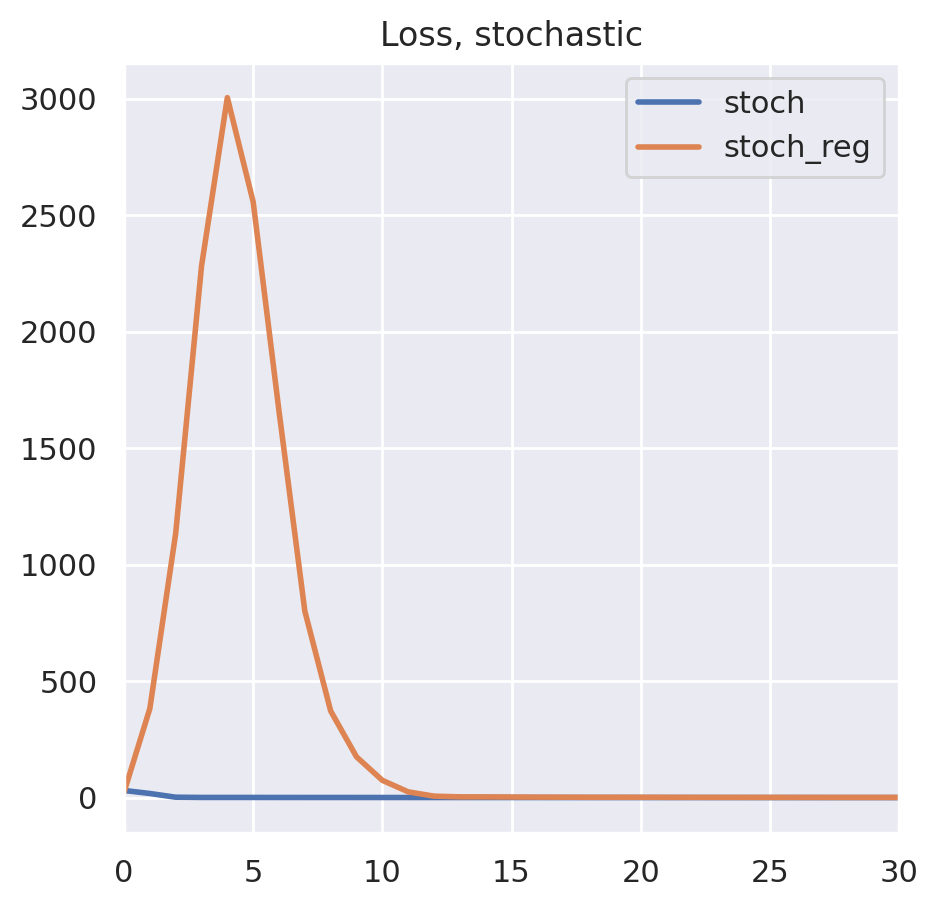

In [77]:
plt.figure(figsize = (5, 5))

plt.title('Loss, stochastic', fontsize=12)

plt.plot(np.arange(len(loss_stoch)), loss_stoch,
         linestyle = '-',
         linewidth = 2,
         label="stoch")
plt.plot(np.arange(len(loss_stoch_reg)), loss_stoch_reg,
         linestyle = '-',
         linewidth = 2,
         label="stoch_reg")
plt.legend()
plt.xlim(0,30)
plt.show()

Ошибка стартует с одинакового значения, но регуляризованная сначала сильно ошибается. Почему-то 3 итерации делаются боьшие шаги в сильно неправильном направлении. Видимо стохастический градиент и так только примерно описывает градиент + регуляризация искажает направление, тк нужно обращать внимание на уменьшение нормы весов.

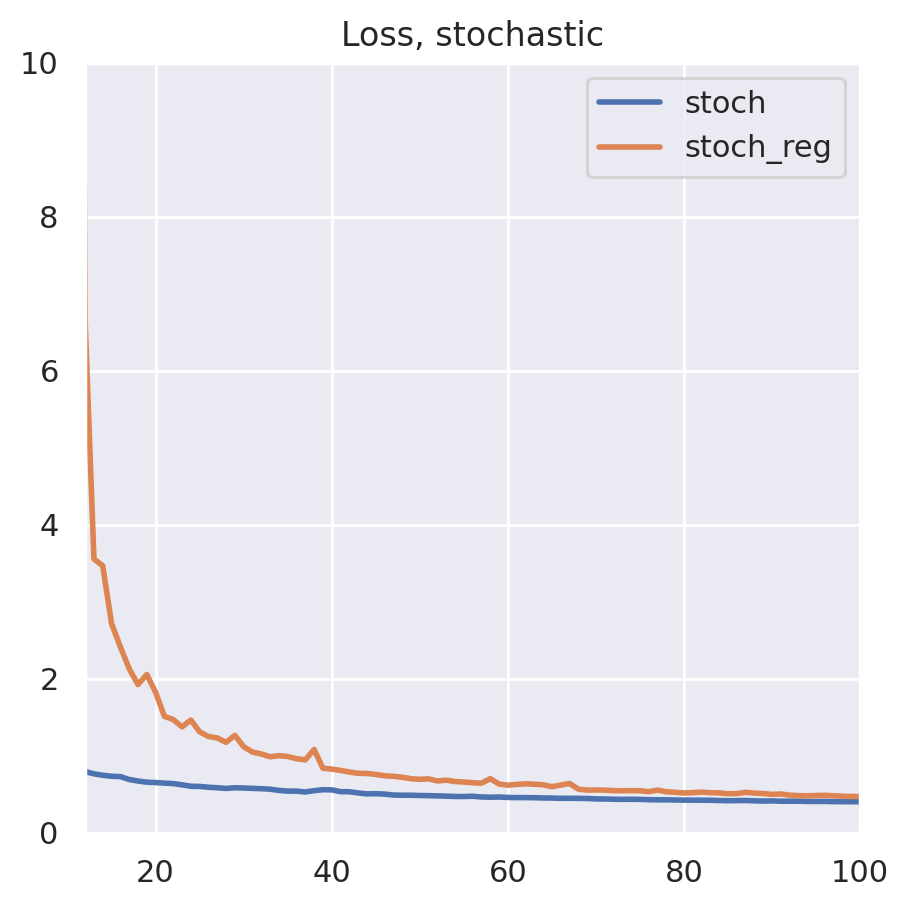

In [83]:
plt.figure(figsize = (5, 5))

plt.title('Loss, stochastic', fontsize=12)

plt.plot(np.arange(len(loss_stoch)), loss_stoch,
         linestyle = '-',
         linewidth = 2,
         label="stoch")
plt.plot(np.arange(len(loss_stoch_reg)), loss_stoch_reg,
         linestyle = '-',
         linewidth = 2,
         label="stoch_reg")
plt.legend()
plt.xlim(12,100)
plt.ylim(0,10)
plt.show()

Также без ругуляризации сходится быстрее

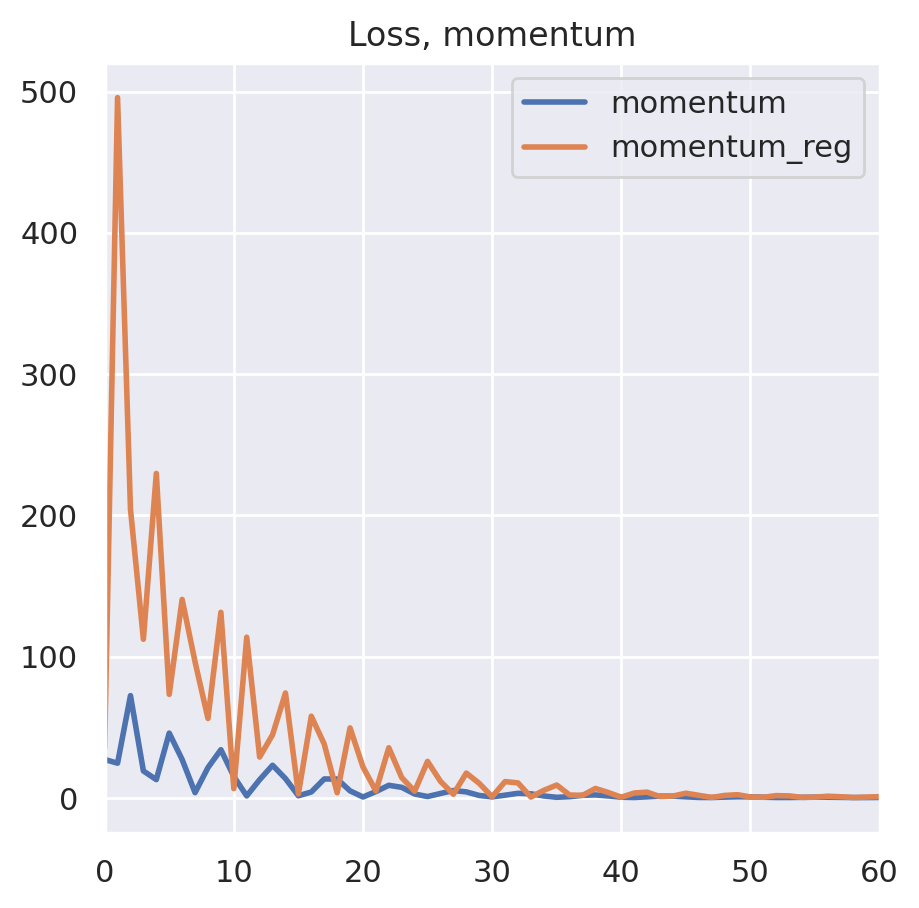

In [98]:
plt.figure(figsize = (5, 5))

plt.title('Loss, momentum', fontsize=12)

plt.plot(np.arange(len(loss_momentum)), loss_momentum,
         linestyle = '-',
         linewidth = 2,
         label="momentum")
plt.plot(np.arange(len(loss_momentum_reg)), loss_momentum_reg,
         linestyle = '-',
         linewidth = 2,
         label="momentum_reg")
plt.legend()
plt.xlim(0,60)
plt.show()

Видимо веса колеюлются, хотя спуск с моментом должен наоборот препятствовать колебаниям..

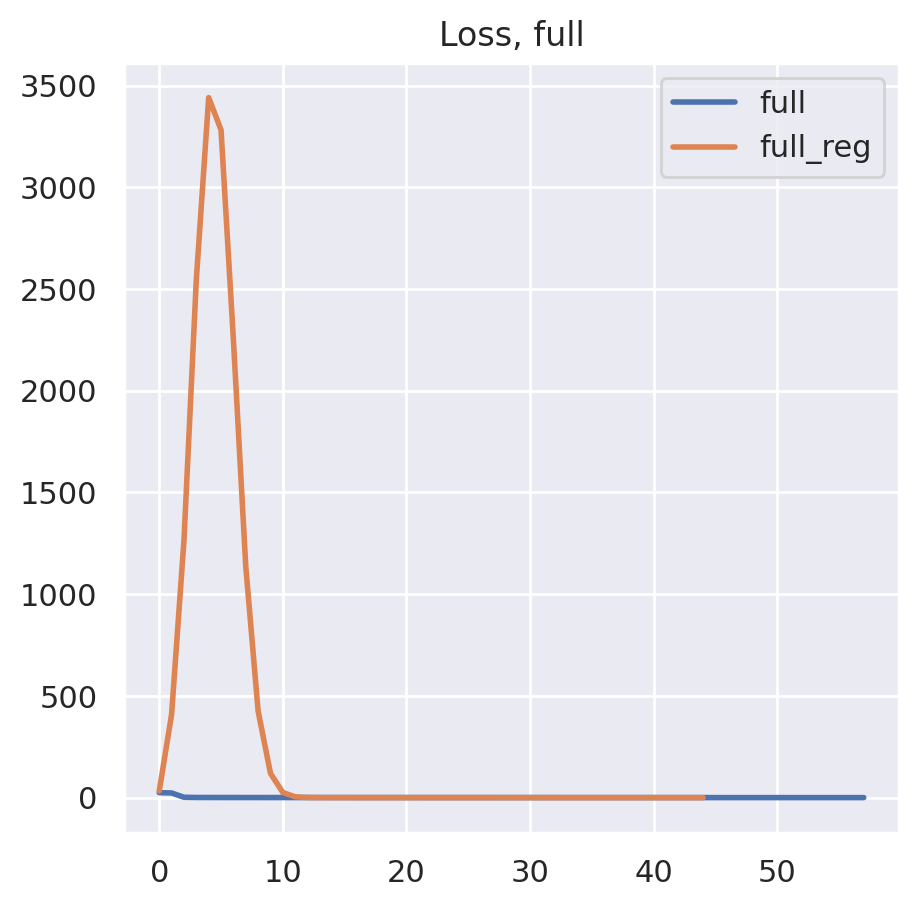

In [99]:
plt.figure(figsize = (5, 5))

plt.title('Loss, full', fontsize=12)

plt.plot(np.arange(len(loss_full)), loss_full,
         linestyle = '-',
         linewidth = 2,
         label="full")
plt.plot(np.arange(len(loss_full_reg)), loss_full_reg,
         linestyle = '-',
         linewidth = 2,
         label="full_reg")
plt.legend()
# plt.xlim(0,30)
plt.show()

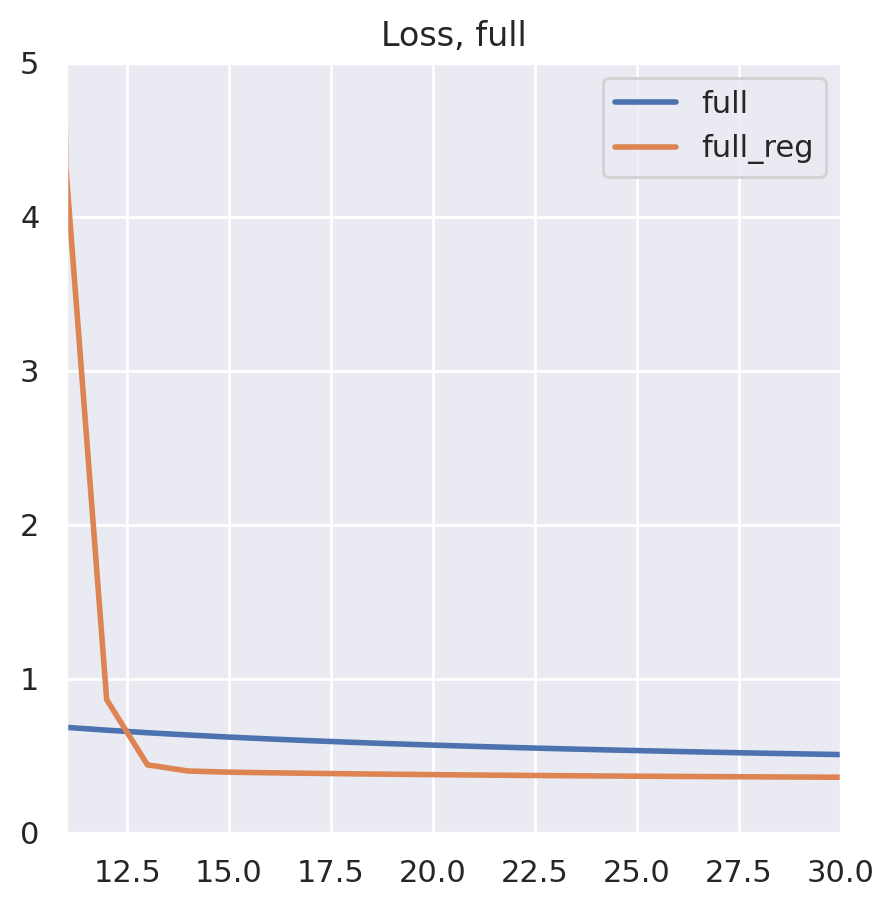

In [100]:
plt.figure(figsize = (5, 5))

plt.title('Loss, full', fontsize=12)

plt.plot(np.arange(len(loss_full)), loss_full,
         linestyle = '-',
         linewidth = 2,
         label="full")
plt.plot(np.arange(len(loss_full_reg)), loss_full_reg,
         linestyle = '-',
         linewidth = 2,
         label="full_reg")
plt.legend()
plt.xlim(11,30)
plt.ylim(0,5)
plt.show()

Аналогично стохастическому спуску

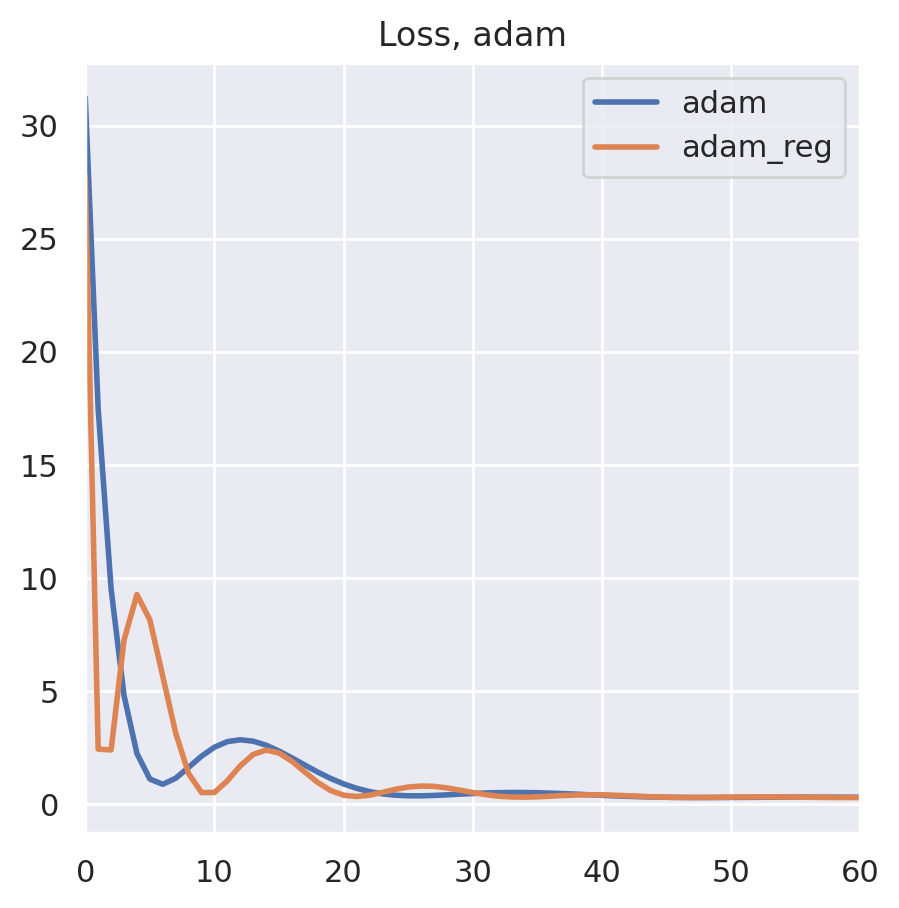

In [101]:
plt.figure(figsize = (5, 5))

plt.title('Loss, adam', fontsize=12)

plt.plot(np.arange(len(loss_adam)), loss_adam,
         linestyle = '-',
         linewidth = 2,
         label="adam")
plt.plot(np.arange(len(loss_adam_reg)), loss_adam_reg,
         linestyle = '-',
         linewidth = 2,
         label="adam_reg")
plt.legend()
plt.xlim(0,60)
plt.show()

Более плавные колебания

Общий итог: регуляризация немного улучшает качество во всех методах, в полном спуске улучшает значительно. Причем в моем случае качество улучшается и на обучающих данных, что довольно странно, возможно, регуляризация побеждает просто за счет того, что лучше подобраны параметры. В целом видно, что и без регуляризации качество на тесте и трейне одинаковое, поэтому как будто проблемы переобучения в данном случае нет. \
С точки зрения лосса видим, что из-за регуляризации как правило в начале обучения алгоритм путается(отвлекается на уменьшение весов) и отстает от метода без ругуляризации. Из-за этого требуется больше итераций до сходимости.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

Угостил маму домашним борщом и рыбой с пюрешкой!! Ощущения отличные, как и всегда, когда приезжаешь домой:)

<div>
<img src="ph1.jpg" width="300"/>
<img src="ph2.jpg" width="300"/>
<img src="ph3.jpg" width="300"/>
<img src="ph4.jpg" width="300"/>
</div>

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: